<p style="color:blue;font-size:200%;text-align:center"><b>Lead Score Assignment</b></p>

<h9><right>
    Name :Khozema Goodluck<br>
    Batch :- UpGrad & IIITB | Data Science Program - August 2023<br>
    Email Id :- goodluck.khozema@agmail.com<br>
    </right>
</h9>
    

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# **Understanding Data Structure**

In [2]:
# Read Data
data = pd.read_csv("Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Check Shape of Data
data.shape

(9240, 37)

In [6]:
# Value Count for "Prospect ID" & "Lead Number"
print(data["Prospect ID"].nunique())
print(data["Lead Number"].nunique())

9240
9240


**Observation :-**
1. Dataset is having 9240 Records with 37 Features
2. Some of the features are having null values
3. Many Columns are having very long descriptive names . Which Needs to be converted to short names for easy handling
4. "Prospect ID" and "Lead Number" are unique identifier for each record . These column are not usefull for analysis and can be dropped


In [7]:
# Drop columns "Prospect ID" and "Lead Number"
data.drop(columns=["Prospect ID","Lead Number"],axis=1 ,inplace=True)

In [8]:
# Rename columns
data.rename(columns={"Do Not Email":"DN_Email",
                     "Do Not Call":"DN_Call",
                     "Total Time Spent on Website":"Web_Time",
                     "Page Views Per Visit":"Page_per_visit",
                     "How did you hear about X Education" :"XEDU_Ref",
                     "What is your current occupation":"Occupation",
                     "What matters most to you in choosing a course":"Reason_course_select",
                     "Newspaper Article":"News_Article",
                     "X Education Forums":"X_Forum",
                     "Digital Advertisement" : "Digi_Adv",
                     "Through Recommedation": "Recommendation",
                     "Receive More Updates About Our Courses":"updt_require",
                     "Update me on Supply Chain Content":"updt_SCcontent",
                     "Get updates on DM Content":"updt_DM",
                     "Asymmetrique Activity Index":"Act_Index",
                     "Asymmetrique Profile Index":"Prof_Index",
                     "Asymmetrique Activity Score":"Act_Score",
                     "Asymmetrique Profile Score":"Prof_Score",
                     "I agree to pay the amount through cheque":"Chq_pymnt",
                     "A free copy of Mastering The Interview" : "Free_Copy",
                     "Last Notable Activity":"Notable_Activity"},inplace=True)
                     
                                
                     
                     
                    

In [9]:
data.head()

,Lead Origin,Lead Source,DN_Email,DN_Call,Converted,TotalVisits,Web_Time,Page_per_visit,Last Activity,Country,Specialization,XEDU_Ref,Occupation,Reason_course_select,Search,Magazine,News_Article,X_Forum,Newspaper,Digi_Adv,Through Recommendations,updt_require,Tags,Lead Quality,updt_SCcontent,updt_DM,Lead Profile,City,Act_Index,Prof_Index,Act_Score,Prof_Score,Chq_pymnt,Free_Copy,Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# **Handling Null Values**

In [10]:
# Count Null Value %
data.isnull().mean()*100

Lead Origin                 0.000000
Lead Source                 0.389610
DN_Email                    0.000000
DN_Call                     0.000000
Converted                   0.000000
TotalVisits                 1.482684
Web_Time                    0.000000
Page_per_visit              1.482684
Last Activity               1.114719
Country                    26.634199
Specialization             15.562771
XEDU_Ref                   23.885281
Occupation                 29.112554
Reason_course_select       29.318182
Search                      0.000000
Magazine                    0.000000
News_Article                0.000000
X_Forum                     0.000000
Newspaper                   0.000000
Digi_Adv                    0.000000
Through Recommendations     0.000000
updt_require                0.000000
Tags                       36.287879
Lead Quality               51.590909
updt_SCcontent              0.000000
updt_DM                     0.000000
Lead Profile               29.318182
C

## **Lead Source**

In [11]:
# Examing Null Values in "Lead Source"
data[data["Lead Source"].isnull()]

,Lead Origin,Lead Source,DN_Email,DN_Call,Converted,TotalVisits,Web_Time,Page_per_visit,Last Activity,Country,Specialization,XEDU_Ref,Occupation,Reason_course_select,Search,Magazine,News_Article,X_Forum,Newspaper,Digi_Adv,Through Recommendations,updt_require,Tags,Lead Quality,updt_SCcontent,updt_DM,Lead Profile,City,Act_Index,Prof_Index,Act_Score,Prof_Score,Chq_pymnt,Free_Copy,Notable_Activity
836,Lead Add Form,NaN,Yes,No,1,NaN,1378,NaN,Email Bounced,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,Modified
1569,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
1746,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,Modified
2020,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
2025,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
2152,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
2346,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
2544,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,number not provided,Not Sure,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Email Opened
2601,Quick Add Form,NaN,Yes,No,1,NaN,2217,NaN,Email Bounced,NaN,E-COMMERCE,Social Media,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Other Metro Cities,02.Medium,02.Medium,14.0,13.0,No,No,Modified
2676,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,SMS Sent


In [12]:
data[data["Lead Source"].isnull()]["Converted"].value_counts()

1    29
0     7
Name: Converted, dtype: int64

In [13]:
# Replace Null Value in "Lead Source" from Mode value from all records where "Lead Origin"="Lead Add Form"

data[data["Lead Source"].isnull()]["Lead Origin"].value_counts()

Lead Add Form              33
Lead Import                 1
Quick Add Form              1
Landing Page Submission     1
Name: Lead Origin, dtype: int64

 **Observation :-**
1. There are 36 records with "Lead Source" is with null values . 
2. From Data Dictionary "Lead Origin" and "Lead Source" seems to be related . Also "Lead Origin" value is "Lead Add Form" in majority cased 
3. Vales in "Lead Source" Can be imputed with "Mode Value" where "Lead Origin"  = Lead Add Form"

In [14]:
# Replace Null values in "Lead Source" with Mode value from all records whre "Lead Origin" = "Lead Add Form"
data["Lead Source"].fillna(data.loc[data["Lead Origin"] == "Lead Add Form"]["Lead Source"].mode().values[0] ,inplace =True)

In [15]:
data["Lead Source"].isnull().mean()

0.0

## **Total Visits , Page_per_visit**

In [16]:
data[data["TotalVisits"].isnull()]

,Lead Origin,Lead Source,DN_Email,DN_Call,Converted,TotalVisits,Web_Time,Page_per_visit,Last Activity,Country,Specialization,XEDU_Ref,Occupation,Reason_course_select,Search,Magazine,News_Article,X_Forum,Newspaper,Digi_Adv,Through Recommendations,updt_require,Tags,Lead Quality,updt_SCcontent,updt_DM,Lead Profile,City,Act_Index,Prof_Index,Act_Score,Prof_Score,Chq_pymnt,Free_Copy,Notable_Activity
77,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Modified
79,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,NaN,Hospitality Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Modified
88,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Lateral Student,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
120,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,NaN,Marketing Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,No,No,Potential Lead,Other Cities,02.Medium,01.High,14.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in full time MBA,Not Sure,No,No,Select,Select,02.Medium,01.High,13.0,18.0,No,No,Modified
8107,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,NaN,"Banking, Investment And Insurance",Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Lost to EINS,Might be,No,No,Potential Lead,Select,02.Medium,01.High,14.0,19.0,No,No,Modified
8434,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Select,Select,02.Medium,01.High,14.0,17.0,No,No,Modified
9015,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,NaN,Supply Chain Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified


In [17]:
data[["TotalVisits","Page_per_visit"]].describe(percentiles=[0.25,0.75,0.90,0.99,0.995])

,TotalVisits,Page_per_visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
99%,17.000000,9.000000
99.5%,21.000000,11.000000


**Observation :-**
1. TotalVisits and Webvisit_time are missing for same records
2. There are 137 records with "TotalVisit" and "Webvisit_time"  null values which are "Missing Completely At Random" . 
3. Statistical summary shows "Righ Skewed Distribution" 
4. Null values to be replaced with median values

In [18]:
# Replace Null Values in TotalVisit, Pages_per_visit with median values
data["TotalVisits"].fillna(data["TotalVisits"].median(),inplace=True)
data["Page_per_visit"].fillna(data["Page_per_visit"].median(),inplace=True)

## **Last Activity**

In [19]:
data[data["Last Activity"].isnull()]

,Lead Origin,Lead Source,DN_Email,DN_Call,Converted,TotalVisits,Web_Time,Page_per_visit,Last Activity,Country,Specialization,XEDU_Ref,Occupation,Reason_course_select,Search,Magazine,News_Article,X_Forum,Newspaper,Digi_Adv,Through Recommendations,updt_require,Tags,Lead Quality,updt_SCcontent,updt_DM,Lead Profile,City,Act_Index,Prof_Index,Act_Score,Prof_Score,Chq_pymnt,Free_Copy,Notable_Activity
77,Lead Add Form,Welingak Website,No,No,1,3.0,1096,2.0,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Modified
79,Lead Add Form,Reference,No,No,1,3.0,705,2.0,NaN,NaN,Hospitality Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,3.0,346,2.0,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Modified
88,Lead Add Form,Reference,No,No,1,3.0,1007,2.0,NaN,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Lateral Student,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
120,Lead Add Form,Reference,No,No,1,3.0,1111,2.0,NaN,NaN,Marketing Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,No,No,Potential Lead,Other Cities,02.Medium,01.High,14.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,3.0,1201,2.0,NaN,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in full time MBA,Not Sure,No,No,Select,Select,02.Medium,01.High,13.0,18.0,No,No,Modified
8107,Lead Add Form,Reference,No,No,1,3.0,903,2.0,NaN,NaN,"Banking, Investment And Insurance",Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Lost to EINS,Might be,No,No,Potential Lead,Select,02.Medium,01.High,14.0,19.0,No,No,Modified
8434,Lead Add Form,Reference,No,No,1,3.0,1458,2.0,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Select,Select,02.Medium,01.High,14.0,17.0,No,No,Modified
9015,Lead Add Form,Reference,No,No,1,3.0,1159,2.0,NaN,NaN,Supply Chain Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified


In [20]:
data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
data[data["Last Activity"].isnull()]["Converted"].value_counts()

1    81
0    22
Name: Converted, dtype: int64

**Observation :-**
1. "Last Activity" is missing for 103 records which is quite high with high number of leads converted .This can be a useful information
2.  Null Values can be replaced with word "missing" to indicate that values is missing


In [22]:
data["Last Activity"].fillna("missing",inplace=True)

## **Country**

In [23]:
data[data["Country"].isnull()]

,Lead Origin,Lead Source,DN_Email,DN_Call,Converted,TotalVisits,Web_Time,Page_per_visit,Last Activity,Country,Specialization,XEDU_Ref,Occupation,Reason_course_select,Search,Magazine,News_Article,X_Forum,Newspaper,Digi_Adv,Through Recommendations,updt_require,Tags,Lead Quality,updt_SCcontent,updt_DM,Lead Profile,City,Act_Index,Prof_Index,Act_Score,Prof_Score,Chq_pymnt,Free_Copy,Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
16,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
47,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,API,Olark Chat,No,No,1,0.0,0,0.0,SMS Sent,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,16.0,15.0,No,No,SMS Sent
9193,Landing Page Submission,Direct Traffic,No,No,0,3.0,50,3.0,SMS Sent,NaN,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Potential Lead,Other Cities of Maharashtra,02.Medium,02.Medium,13.0,16.0,No,Yes,SMS Sent
9199,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Already a student,Not Sure,No,No,Potential Lead,Select,01.High,02.Medium,17.0,16.0,No,No,Modified
9217,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [24]:
data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [25]:
data[data["Country"].isnull()]["Converted"].value_counts()*100 /data[data["Country"].isnull()].shape[0]

0    56.277936
1    43.722064
Name: Converted, dtype: float64

In [26]:
# Count % of records where Country is null or Country is India
round((data[data["Country"].isnull()].shape[0] + data[data["Country"]=="India"].shape[0])*100/len(data))

97

**Observation :-**
1. Majority of Leads are from India as XEDU is company operating majorlly in indian market
2. Missing values are very high 2461.
3. If missing values are replaced with value "India" Total 97%  records will be having (country="India") . So this will not be useful feature for training model . So we can drop this column from analysis.




In [27]:
# Drop "Country" column
data.drop(["Country"],axis=1,inplace=True)

## **Specialization**

In [28]:
# Find value counts for various values in specialization
data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
# Find No. of record with null values
data[data["Specialization"].isnull()].shape[0]

1438

In [30]:
# Find % of record where Specialization is missing or Specialization is Select
(data[data["Specialization"].isnull()].shape[0]+data[data["Specialization"]=="Select"].shape[0])*100/len(data)

36.58008658008658

In [31]:
# find distribution of target variable for "Specialization" is "Select" or "null"
spec_null = data.loc[(data["Specialization"]=="Select") | (data["Specialization"].isnull())]
spec_null["Converted"].value_counts()*100/len(spec_null)

0    71.331361
1    28.668639
Name: Converted, dtype: float64

**Observation:-**
1. There are approximately 36% records where Specialization is "null values" or "Select" which both can be considered as missing values
2. Out of all records with missing values about 71% leads are not converted . This can proved to be important factor for further analysis
3. Replace "null values" with "Select" to indicate that this parameter is missing



In [32]:
# Replace null values with "Select"

data["Specialization"].fillna("Select",inplace=True)

In [33]:
#Verify if replacement is done
data["Specialization"].value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

## **XEDU_Ref**

In [34]:
# Check Count of Missing Values in "XEDU_Ref"
len(data[data["XEDU_Ref"].isnull()])

2207

In [35]:
# Check Count of Other Values in "XEDU_Ref"
data["XEDU_Ref"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: XEDU_Ref, dtype: int64

In [36]:
# Count % of records where "XEDU_Ref" is "null" or "Select"
len(data.loc[(data["XEDU_Ref"].isnull()) | (data["XEDU_Ref"]=="Select")])*100/len(data)


78.46320346320347

In [37]:
# Target Value Distribution for  records where "XEDU_Ref" is "null" or "Select" and other values
XEDU_ref_null =data.loc[(data["XEDU_Ref"].isnull()) | (data["XEDU_Ref"]=="Select")]
XEDU_ref_nonnull =data.loc[-((data["XEDU_Ref"].isnull()) | (data["XEDU_Ref"]=="Select"))]

print(XEDU_ref_null["Converted"].value_counts()*100/len(XEDU_ref_null))
print(XEDU_ref_nonnull["Converted"].value_counts()*100/len(XEDU_ref_nonnull))


0    62.565517
1    37.434483
Name: Converted, dtype: float64
0    57.437186
1    42.562814
Name: Converted, dtype: float64


**Observation:-**
1. There are about 78% records where "XEDU_Ref" value is missing from which about 62% leads are not converted. This can be a good indicator if lead will be converted or not.

2. Replace "null values" with "Select to indicate that the parameter is missing


In [38]:
# Replace "null values" in "XEDU_Ref" with "Select"

data["XEDU_Ref"].fillna("Select",inplace=True)

In [39]:
# Verify if "null values" are replaced
len(data[data["XEDU_Ref"].isnull()])

0

## **Occupation**

In [40]:
# No. of Record with "Ocuupation" is missing
len(data[data["Occupation"].isnull()]) *100 / len(data)

29.11255411255411

In [41]:
# Count of values in "Occupation"
data["Occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [42]:
# % Distribution of Target Variables where vales is missing
data[data["Occupation"].isnull()]["Converted"].value_counts()*100 / (len(data[data["Occupation"].isnull()]))


0    86.245353
1    13.754647
Name: Converted, dtype: float64

**Observation :-**
1. Thrre are about 29% data for which "Occupation" is missing.
2. From All recoreds with missing "Occupation" 86% are not negative lead. Which can be a good indicator.
3. Replace missing value with "Select" to indicate Missing Value



In [43]:
# Replace Missing value in "Occupation" with "Select"

data["Occupation"].fillna("Select",inplace=True)

In [44]:
# Verify if replacement is done
# No. of Record with "Ocuupation" is missing
len(data[data["Occupation"].isnull()]) *100 / len(data)


0.0

## **Reason_course_select**

In [45]:
# No. of Record with "Ocuupation" is missing
len(data[data["Reason_course_select"].isnull()]) *100 / len(data)

29.318181818181817

In [46]:
# Value counts for diffrent values in "Reason_course_select"
data["Reason_course_select"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Reason_course_select, dtype: int64

In [47]:
# % Distribution of Target Variable for missing values
data[data["Reason_course_select"].isnull()]["Converted"].value_counts() *100 / len(data[data["Reason_course_select"].isnull()])


0    86.341824
1    13.658176
Name: Converted, dtype: float64

 **Observation:-**
1. Missing values are about 29% which is second highest after "Better Career Prospects"
2. About 86% missing values records lead conversion is negative . This can be important factor for anlaysis
3. Replace "null values" in "Reason_course_select" with "Select"

In [48]:
# Replace Missing value in "Reason_course_select" with "Select"

data["Reason_course_select"].fillna("Select",inplace=True)

In [49]:
# Verify if replacement is done
# No. of Record with "Reason_course_select" is missing
len(data[data["Reason_course_select"].isnull()]) *100 / len(data)


0.0

## **Lead Quality**

In [50]:
# No. of Record with "Lead Quality" is missing
len(data[data["Lead Quality"].isnull()]) *100 / len(data)

51.59090909090909

In [51]:
# Value counts for diffrent values in "Lead Quality"
data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [52]:
# % Distribution of Target Variable for missing values
data[data["Lead Quality"].isnull()]["Converted"].value_counts() *100 / len(data[data["Lead Quality"].isnull()])


0    78.518985
1    21.481015
Name: Converted, dtype: float64

**Observation :-**
1. Missing values are about 51% which is highest
2. About 79% missing values records lead conversion is negative . This can be important factor for anlaysis
3. Replace "null values" in "Lead Quality" with "Select"

In [53]:
# Replace Missing value in "Lead Quality" with "Select"

data["Lead Quality"].fillna("Select",inplace=True)

In [54]:
# Verify if replacement is done
# No. of Record with "Reason_course_select" is missing
len(data[data["Lead Quality"].isnull()]) *100 / len(data)


0.0

## **Tags**

In [55]:
# No. of Record with "Tags is missing
len(data[data["Tags"].isnull()]) 

3353

In [56]:
# Value counts for diffrent values in "Tags"
data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [57]:
# % Distribution of Target Variable for missing values
data[data["Tags"].isnull()]["Converted"].value_counts() *100 / len(data[data["Tags"].isnull()])


0    75.067104
1    24.932896
Name: Converted, dtype: float64

**Observation :-**
1. Missing values are about 36% ,highest for all possible values of Tags.
2. About 75% missing values records lead conversion is negative . This can be important factor for anlaysis
3. Replace "null values" in "Tags" with "Select"

In [58]:
# Replace Missing value in "Tags" with "Select"

data["Tags"].fillna("Select",inplace=True)

In [59]:
# Verify if replacement is done
# No. of Record with "Tags" is missing
len(data[data["Tags"].isnull()]) *100 / len(data)


0.0

## **Lead Profile**

In [60]:
# No. of Record with "Lead Profile" is missing
len(data[data["Lead Profile"].isnull()]) 

2709

In [61]:
# Value counts for diffrent values in "Lead Profile"
data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [62]:
# Total % of data with Lead Profile is "Null" or "Select"
len(data.loc[(data["Lead Profile"].isnull()) | (data["Lead Profile"]=="Select")])*100/len(data)


74.18831168831169

In [63]:
# Target Value Distribution for  records where "Lead Profile" is "null" or "Select" and other values
Lead_profile_null =data.loc[(data["Lead Profile"].isnull()) | (data["Lead Profile"]=="Select")]
Lead_profile_nonnull =data.loc[-((data["Lead Profile"].isnull()) | (data["Lead Profile"]=="Select"))]

print(Lead_profile_null["Converted"].value_counts()*100/len(Lead_profile_null))
print(Lead_profile_nonnull["Converted"].value_counts()*100/len(Lead_profile_nonnull))

0    69.919767
1    30.080233
Name: Converted, dtype: float64
1    62.851153
0    37.148847
Name: Converted, dtype: float64


**Observation :-**
1. 74% Records are either with missing values or "Select" which can be also treated as missing information.
2. % distribution of Target variable for both missing records and non missing records is approximately similar .
3. Lead Profile does not seem important driving factor so this column can be dropped from analysis


In [64]:
# Drop "Lead Profile Column"

data.drop(columns="Lead Profile",axis=1,inplace=True)

In [65]:
# Verify if column is dropped
data.columns

Index(['Lead Origin', 'Lead Source', 'DN_Email', 'DN_Call', 'Converted',
       'TotalVisits', 'Web_Time', 'Page_per_visit', 'Last Activity',
       'Specialization', 'XEDU_Ref', 'Occupation', 'Reason_course_select',
       'Search', 'Magazine', 'News_Article', 'X_Forum', 'Newspaper',
       'Digi_Adv', 'Through Recommendations', 'updt_require', 'Tags',
       'Lead Quality', 'updt_SCcontent', 'updt_DM', 'City', 'Act_Index',
       'Prof_Index', 'Act_Score', 'Prof_Score', 'Chq_pymnt', 'Free_Copy',
       'Notable_Activity'],
      dtype='object')

## **City**

In [66]:
# No. of Record with "City" is missing
len(data[data["City"].isnull()]) 

1420

In [67]:
# Value counts for diffrent values in "Lead Profile"
data["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [68]:
# Total % of data with Lead Profile is "Null" or "Select"
len(data.loc[(data["City"].isnull()) | (data["City"]=="Select")])*100/len(data)


39.70779220779221

In [69]:
# Target Value Distribution for  records where "City" is "null" or "Select" and other values
City_null =data.loc[(data["City"].isnull()) | (data["City"]=="Select")]
City_nonnull =data.loc[-((data["City"].isnull()) | (data["City"]=="Select"))]

print(City_null["Converted"].value_counts()*100/len(City_null))
print(City_nonnull["Converted"].value_counts()*100/len(City_nonnull))

0    65.739984
1    34.260016
Name: Converted, dtype: float64
0    58.642973
1    41.357027
Name: Converted, dtype: float64


In [70]:
data[data["City"] =="Mumbai"]["Converted"].value_counts()*100 /len(data[data["City"] =="Mumbai"])

0    59.37306
1    40.62694
Name: Converted, dtype: float64

**Observation :-**
1. 40% Records are either with missing values or "Select" which can be also treated as missing information.
2. "Mumbai has heighest number of distribtion
2. % distribution of Target variable for both missing records and non missing records is approximately similar . Also for mumbai target variable distribution is similar
3. City does not seem important driving factor so this column can be dropped from analysis


In [71]:
# Drop "City" Column

data.drop(columns="City",axis=1,inplace=True)

In [72]:
# Verify if column is dropped
data.columns

Index(['Lead Origin', 'Lead Source', 'DN_Email', 'DN_Call', 'Converted',
       'TotalVisits', 'Web_Time', 'Page_per_visit', 'Last Activity',
       'Specialization', 'XEDU_Ref', 'Occupation', 'Reason_course_select',
       'Search', 'Magazine', 'News_Article', 'X_Forum', 'Newspaper',
       'Digi_Adv', 'Through Recommendations', 'updt_require', 'Tags',
       'Lead Quality', 'updt_SCcontent', 'updt_DM', 'Act_Index', 'Prof_Index',
       'Act_Score', 'Prof_Score', 'Chq_pymnt', 'Free_Copy',
       'Notable_Activity'],
      dtype='object')

## **Act_Index**

In [73]:
# No. of Record with "Act_Index" is missing
len(data[data["Act_Index"].isnull()]) 

4218

In [74]:
# Value counts for diffrent values in "Lead Profile"
data["Act_Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Act_Index, dtype: int64

In [75]:
# % Distribution of Target Variable for missing values
print(data[data["Act_Index"].isnull()]["Converted"].value_counts() *100 / len(data[data["Act_Index"].isnull()]))

#% Distribution of Target Variable for Non Missing Values
print(data[-data["Act_Index"].isnull()]["Converted"].value_counts() *100 / len(data[-data["Act_Index"].isnull()]))

0    60.810811
1    39.189189
Name: Converted, dtype: float64
0    62.007168
1    37.992832
Name: Converted, dtype: float64


**Observation :-**
1. 46% Records are either with missing values .
2. % distribution of Target variable for both missing records and non missing records is approximately similar .
3. "Act_Index" does not seem important driving factor so this column can be dropped from analysis


In [76]:
# Drop "Act_Index" Column

data.drop(columns="Act_Index",axis=1,inplace=True)

In [77]:
# Verify if column is dropped
data.columns

Index(['Lead Origin', 'Lead Source', 'DN_Email', 'DN_Call', 'Converted',
       'TotalVisits', 'Web_Time', 'Page_per_visit', 'Last Activity',
       'Specialization', 'XEDU_Ref', 'Occupation', 'Reason_course_select',
       'Search', 'Magazine', 'News_Article', 'X_Forum', 'Newspaper',
       'Digi_Adv', 'Through Recommendations', 'updt_require', 'Tags',
       'Lead Quality', 'updt_SCcontent', 'updt_DM', 'Prof_Index', 'Act_Score',
       'Prof_Score', 'Chq_pymnt', 'Free_Copy', 'Notable_Activity'],
      dtype='object')

## **Prof_Index , Act_Score,Prof_Score**

**Observation :-**
1. "Prof_Index", "Act_Score","Prof_Score" have missing values for the same records where "Act_Index" has missing value
2. Same as "Act_Index ,these columns can be dropped from analysis too



In [78]:
# Drop "Prof_Index", "Act_Score","Prof_Score"

data.drop(columns=["Prof_Index", "Act_Score","Prof_Score"],axis=1,inplace=True)

In [79]:
# Verify if column is dropped
data.columns

Index(['Lead Origin', 'Lead Source', 'DN_Email', 'DN_Call', 'Converted',
       'TotalVisits', 'Web_Time', 'Page_per_visit', 'Last Activity',
       'Specialization', 'XEDU_Ref', 'Occupation', 'Reason_course_select',
       'Search', 'Magazine', 'News_Article', 'X_Forum', 'Newspaper',
       'Digi_Adv', 'Through Recommendations', 'updt_require', 'Tags',
       'Lead Quality', 'updt_SCcontent', 'updt_DM', 'Chq_pymnt', 'Free_Copy',
       'Notable_Activity'],
      dtype='object')

In [80]:
# verify if all columns are treated
data.isnull().sum()

Lead Origin                0
Lead Source                0
DN_Email                   0
DN_Call                    0
Converted                  0
TotalVisits                0
Web_Time                   0
Page_per_visit             0
Last Activity              0
Specialization             0
XEDU_Ref                   0
Occupation                 0
Reason_course_select       0
Search                     0
Magazine                   0
News_Article               0
X_Forum                    0
Newspaper                  0
Digi_Adv                   0
Through Recommendations    0
updt_require               0
Tags                       0
Lead Quality               0
updt_SCcontent             0
updt_DM                    0
Chq_pymnt                  0
Free_Copy                  0
Notable_Activity           0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead Origin              9240 non-null   object 
 1   Lead Source              9240 non-null   object 
 2   DN_Email                 9240 non-null   object 
 3   DN_Call                  9240 non-null   object 
 4   Converted                9240 non-null   int64  
 5   TotalVisits              9240 non-null   float64
 6   Web_Time                 9240 non-null   int64  
 7   Page_per_visit           9240 non-null   float64
 8   Last Activity            9240 non-null   object 
 9   Specialization           9240 non-null   object 
 10  XEDU_Ref                 9240 non-null   object 
 11  Occupation               9240 non-null   object 
 12  Reason_course_select     9240 non-null   object 
 13  Search                   9240 non-null   object 
 14  Magazine                

<p style=";font-size:200%"><b>============================================================</b></p>

# **Univariate Analysis** 
1. Handling irregular values
2. Handling Outliers
3. Visualization of Data and Analzing
4. Segmented Analysis for Target Variable - "Converted"


In [82]:
data.head(10)

,Lead Origin,Lead Source,DN_Email,DN_Call,Converted,TotalVisits,Web_Time,Page_per_visit,Last Activity,Specialization,XEDU_Ref,Occupation,Reason_course_select,Search,Magazine,News_Article,X_Forum,Newspaper,Digi_Adv,Through Recommendations,updt_require,Tags,Lead Quality,updt_SCcontent,updt_DM,Chq_pymnt,Free_Copy,Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Select,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Select,Select,Select,Select,No,No,No,No,No,No,No,No,Select,Select,No,No,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Select,Select,Select,Select,No,No,No,No,No,No,No,No,Select,Select,No,No,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Select,Select,Select,No,No,No,No,No,No,No,No,Select,Select,No,No,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,Finance Management,Word Of Mouth,Select,Select,No,No,No,No,No,No,No,No,Select,Select,No,No,No,No,Email Opened


In [83]:
# List of Numerical Column Names
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col.remove("Converted")
num_col

['TotalVisits', 'Web_Time', 'Page_per_visit']

In [84]:
# List of Catagorical Column Names
cat_col =data.select_dtypes(exclude=np.number).columns.tolist()
cat_col.append("Converted")

In [85]:
cat_col

['Lead Origin',
 'Lead Source',
 'DN_Email',
 'DN_Call',
 'Last Activity',
 'Specialization',
 'XEDU_Ref',
 'Occupation',
 'Reason_course_select',
 'Search',
 'Magazine',
 'News_Article',
 'X_Forum',
 'Newspaper',
 'Digi_Adv',
 'Through Recommendations',
 'updt_require',
 'Tags',
 'Lead Quality',
 'updt_SCcontent',
 'updt_DM',
 'Chq_pymnt',
 'Free_Copy',
 'Notable_Activity',
 'Converted']

In [86]:
# Function for Catagorical Column Analysis
def uni_cat(col_name,target_col_name):
    col_index = data.columns.get_loc(col_name)
    plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(data=data,x=col_name,hue=target_col_name)
    #data.iloc[:,col_index].value_counts().plot.bar()
    plt.xlabel(col_name)
    plt.ylabel("Counts")
    plt.xticks(rotation=90)
    plt.title(col_name)
    
    plt.subplot(1,2,2)
    data.iloc[:,col_index].value_counts().plot.pie(autopct="%.2f")
    plt.title(col_name)
   
    plt.show()

    bold ="\33[1m"
    print(bold+"Category Wise % Counts")
    temp_1=data.iloc[:,col_index].value_counts()*100/len(data)
    temp_2=round(pd.crosstab(data[col_name],data[target_col_name],normalize="index")*100,2)
    display(temp_1)
    display(temp_2)
    sns.heatmap(temp_2,cmap="Blues",annot=True)
    plt.show()
  
    
  

## **Univariate Analysis - Categorical Columns**

### **Lead Origin**

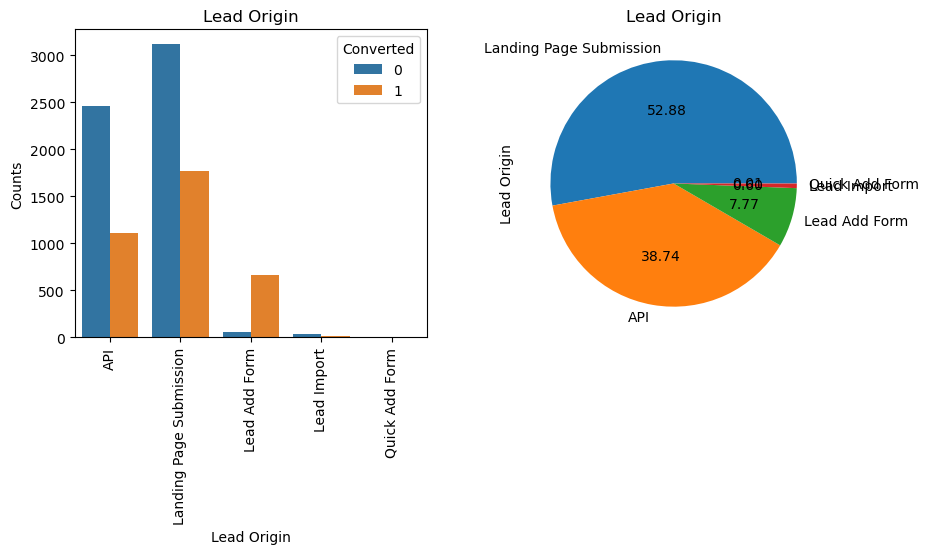

Category Wise % Counts


Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Converted,0,1
Lead Origin,,
API,68.85,31.15
Landing Page Submission,63.81,36.19
Lead Add Form,7.52,92.48
Lead Import,76.36,23.64
Quick Add Form,0.00,100.00


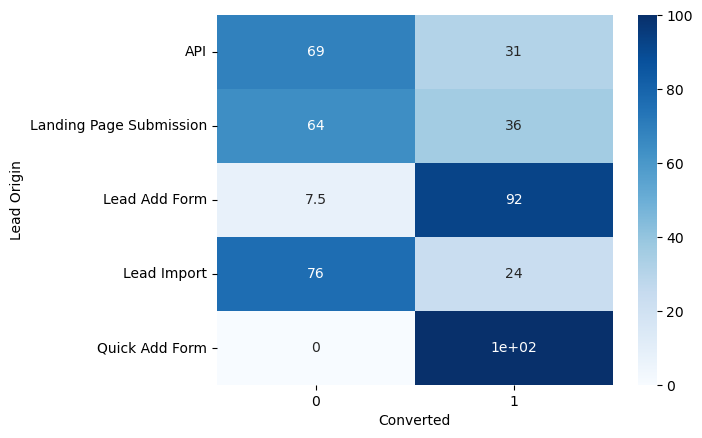

In [87]:
uni_cat("Lead Origin","Converted")

**Observation:-**
1. Majority of Leads are from "API" and "Landing Page Submission" 
2. "Lead Import" and "Quick Add Form" are very low counts . These catagories can be clubbed under other catagories.
3. For Category "Lead Add Form" probabilty of lead turning positive is high

In [88]:
# Replace "Lead Import" and "Quick Add Form" in "Lead Origin" column with "Others"
data["Lead Origin"].replace(["Lead Import" ,"Quick Add Form"],"Others",inplace=True)

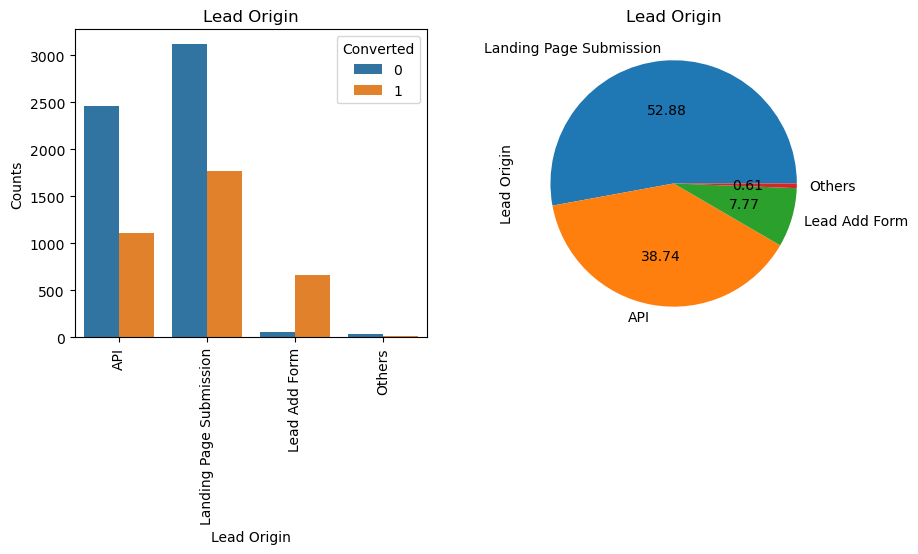

Category Wise % Counts


Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead Origin, dtype: float64

Converted,0,1
Lead Origin,,
API,68.85,31.15
Landing Page Submission,63.81,36.19
Lead Add Form,7.52,92.48
Others,75.00,25.00


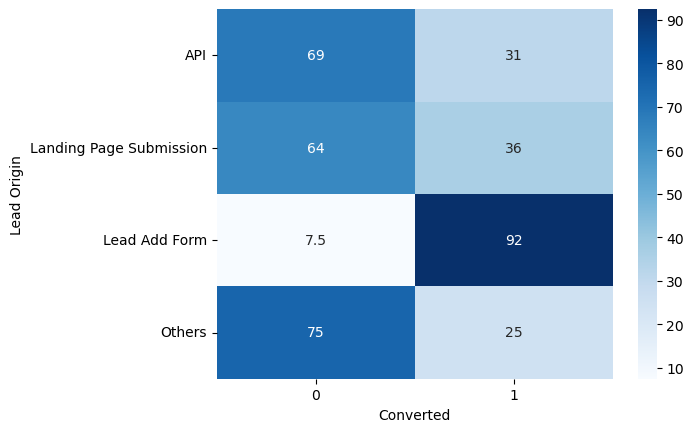

In [89]:
# Verify change
uni_cat("Lead Origin","Converted")


### **Lead Source**

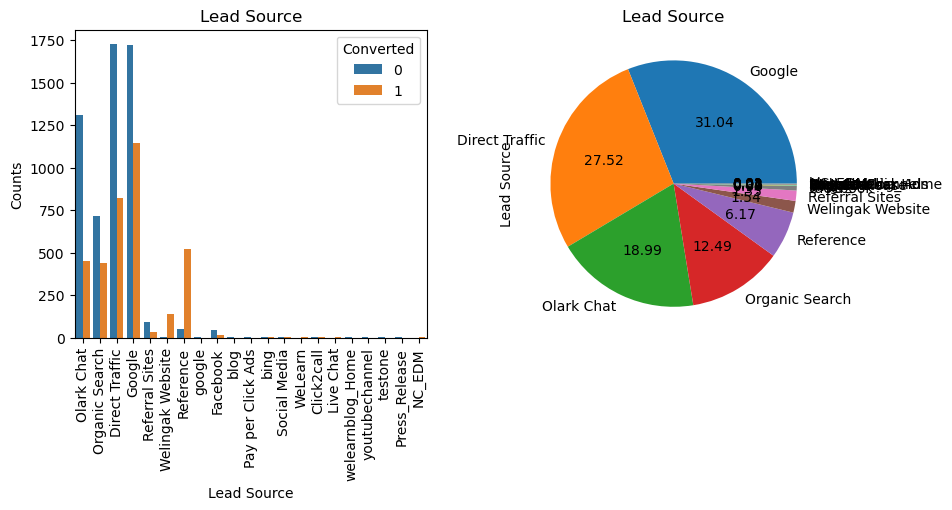

Category Wise % Counts


Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             6.168831
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

Converted,0,1
Lead Source,,
Click2call,25.00,75.00
Direct Traffic,67.83,32.17
Facebook,76.36,23.64
Google,60.01,39.99
Live Chat,0.00,100.00
NC_EDM,0.00,100.00
Olark Chat,74.47,25.53
Organic Search,62.22,37.78
Pay per Click Ads,100.00,0.00


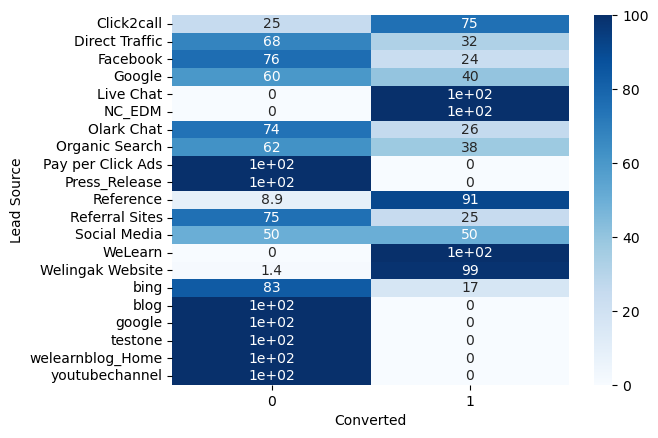

In [90]:
uni_cat("Lead Source","Converted")

**Observation:-**
1. There are many values with count less than 6% . These values with value count <6% can be clubbed to catagory "Others"
2. If Lead Source is "Reference" probabiltiy of lead turning positive is very high

In [91]:
# Club all catagories with  value count <6% to "Others" category

#1. Store value count % in panda series
x =(data["Lead Source"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<6].index.tolist()

#3. Replace all catagories in dataframe with others
data["Lead Source"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["Lead Source"].value_counts()*100/len(data)

Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          6.168831
Others             3.787879
Name: Lead Source, dtype: float64

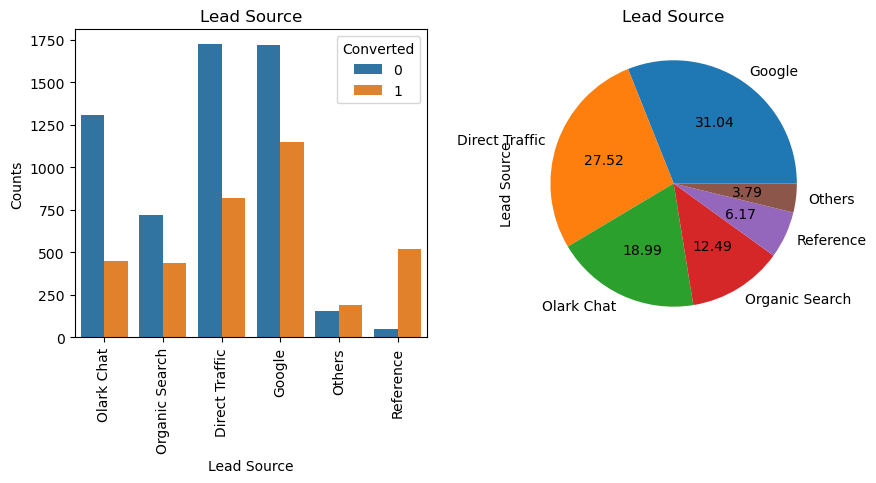

Category Wise % Counts


Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          6.168831
Others             3.787879
Name: Lead Source, dtype: float64

Converted,0,1
Lead Source,,
Direct Traffic,67.83,32.17
Google,60.01,39.99
Olark Chat,74.47,25.53
Organic Search,62.22,37.78
Others,44.86,55.14
Reference,8.95,91.05


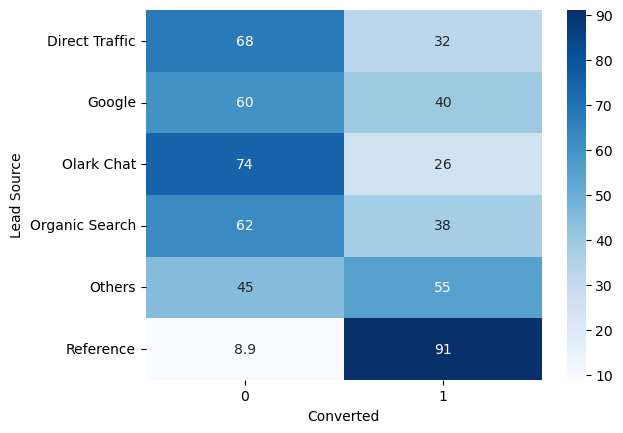

In [92]:
uni_cat("Lead Source","Converted")

### **DN_Email**

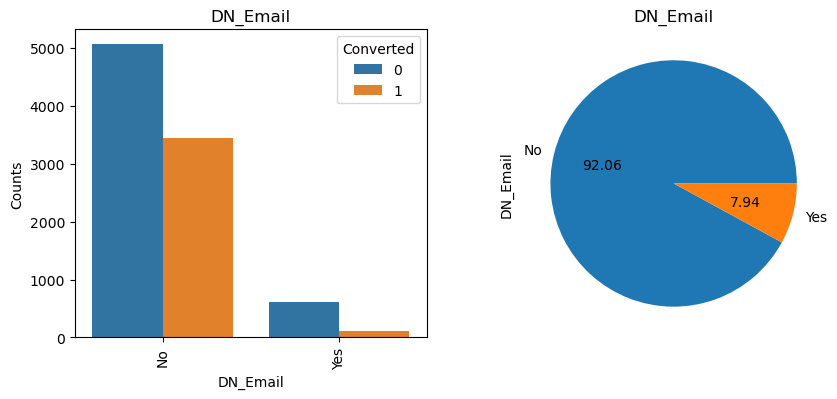

Category Wise % Counts


No     92.056277
Yes     7.943723
Name: DN_Email, dtype: float64

Converted,0,1
DN_Email,,
No,59.52,40.48
Yes,83.92,16.08


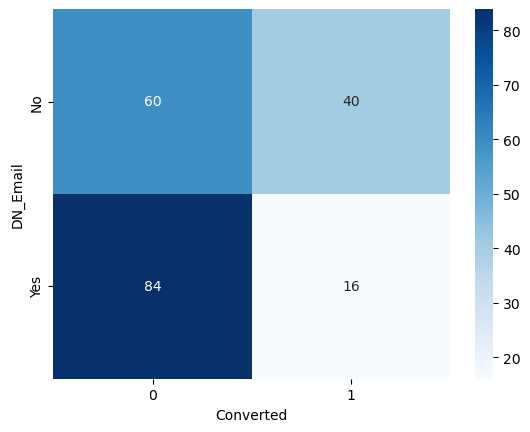

In [93]:
uni_cat("DN_Email","Converted")

**Observation:-**
1. 92% values have "DN_Email"=0 so this feature seems not important for further analysis
2. "Yes" , "No" can be converted to 1 , 0 respctively 

In [94]:
# Replace Yes/No with 1/0
data["DN_Email"].replace(["Yes","No"],[1,0],inplace=True)

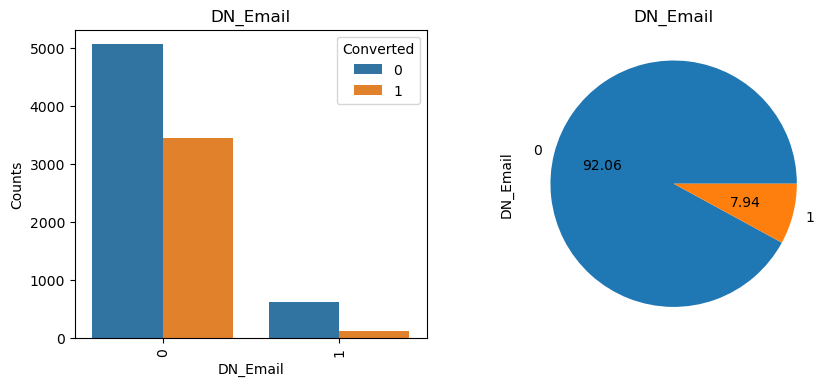

Category Wise % Counts


0    92.056277
1     7.943723
Name: DN_Email, dtype: float64

Converted,0,1
DN_Email,,
0,59.52,40.48
1,83.92,16.08


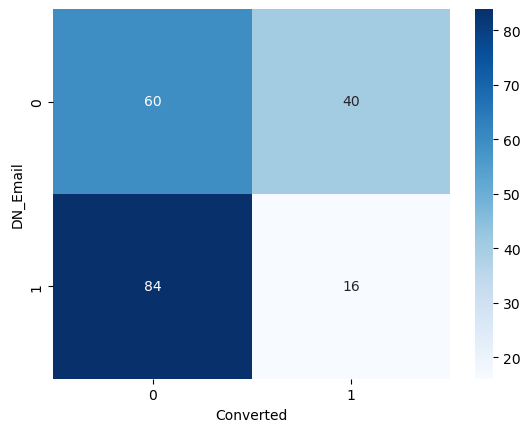

In [95]:
# Verify Changes
uni_cat("DN_Email","Converted")

### **DN_Call**

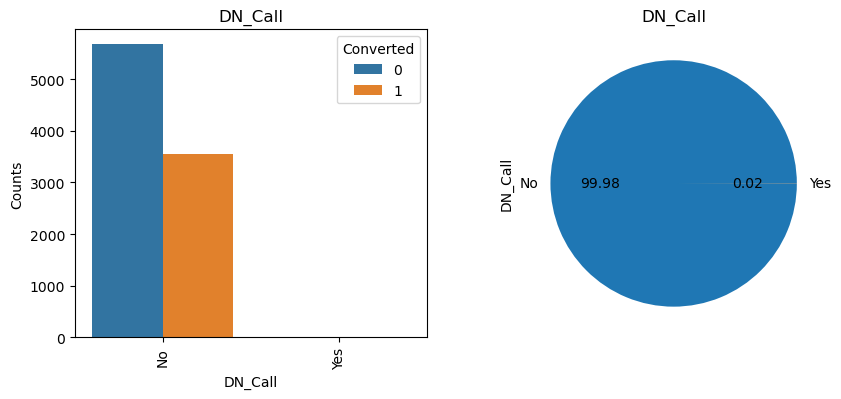

Category Wise % Counts


No     99.978355
Yes     0.021645
Name: DN_Call, dtype: float64

Converted,0,1
DN_Call,,
No,61.47,38.53
Yes,0.00,100.00


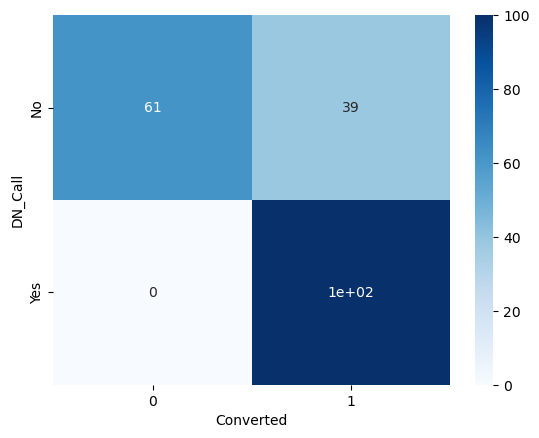

In [96]:
uni_cat("DN_Call","Converted")

**Observation:-**
1. For almost all values DN_Call is No so this column does not seem important for analysis so this column can be dropped


In [97]:
# Drop DN_Call columns
data.drop(columns="DN_Call",axis=1,inplace=True)

### **Last Actitvity**

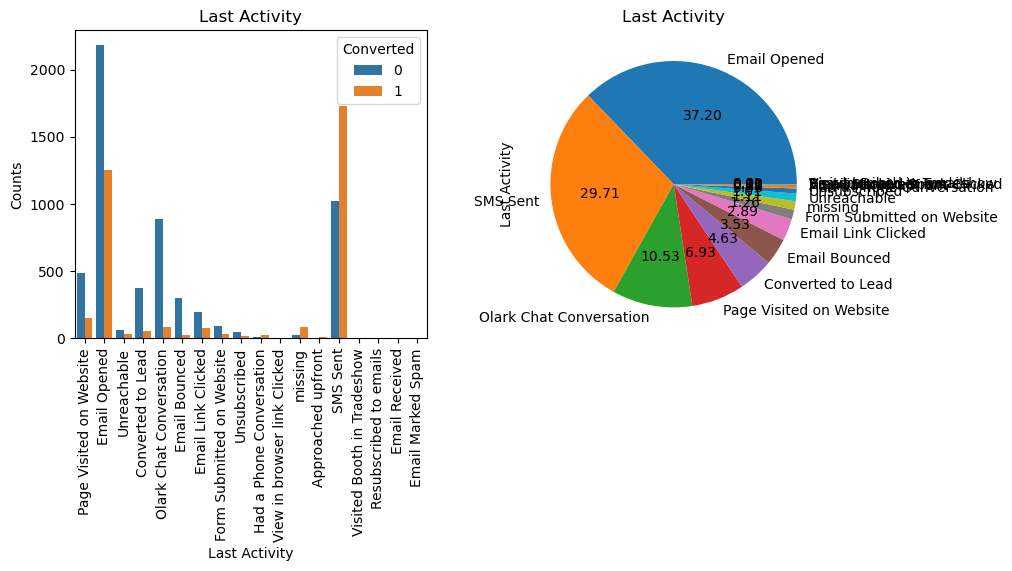

Category Wise % Counts


Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
missing                          1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

Converted,0,1
Last Activity,,
Approached upfront,0.00,100.00
Converted to Lead,87.38,12.62
Email Bounced,92.02,7.98
Email Link Clicked,72.66,27.34
Email Marked Spam,0.00,100.00
Email Opened,63.54,36.46
Email Received,0.00,100.00
Form Submitted on Website,75.86,24.14
Had a Phone Conversation,26.67,73.33


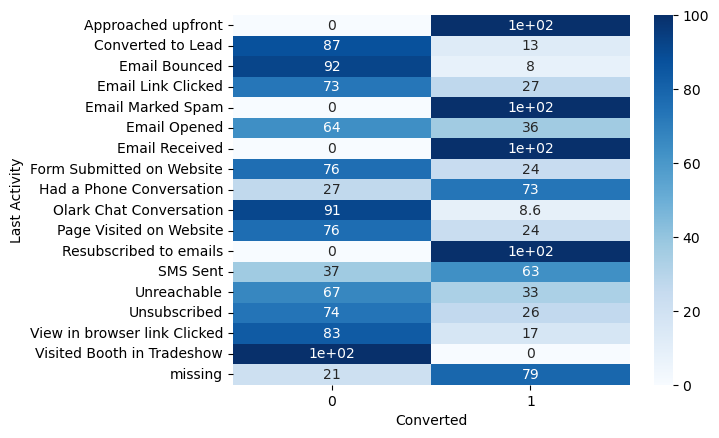

In [98]:
uni_cat("Last Activity","Converted")

**Observation :-**
1. There are many values with count less than 6% . These values with value count <6% can be clubbed to catagory "Others"
2. For Category "SMS Sent" positive lead %  is very high compared to negative lead. SMS Sent is good indicator for positivity of lead 

In [99]:
# Club all catagories with  value count <6% to "Others" category

#1. Store value count % in panda series
x =(data["Last Activity"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<6].index.tolist()

#3. Replace all catagories in dataframe with others
data["Last Activity"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["Last Activity"].value_counts()*100/len(data)

Email Opened               37.196970
SMS Sent                   29.707792
Others                     15.638528
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64

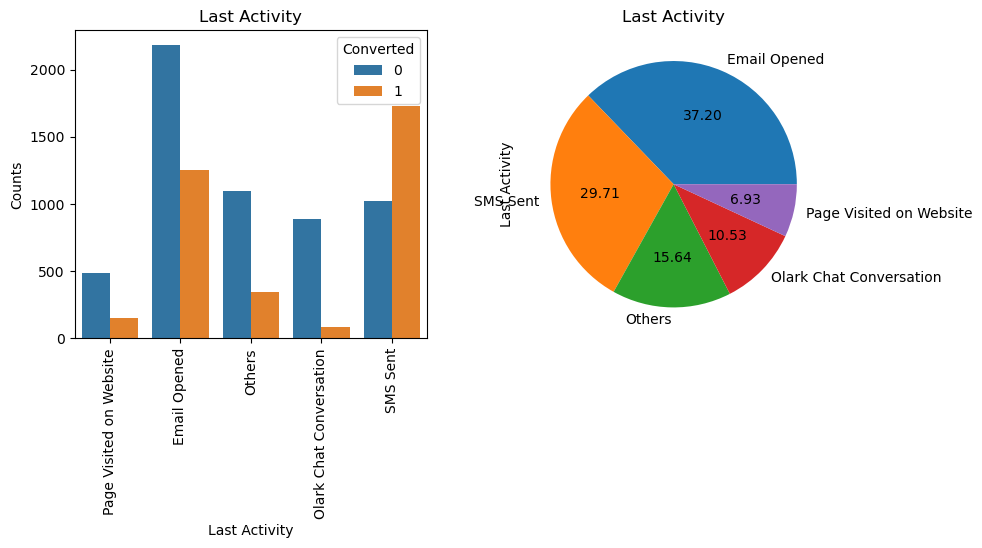

Category Wise % Counts


Email Opened               37.196970
SMS Sent                   29.707792
Others                     15.638528
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64

Converted,0,1
Last Activity,,
Email Opened,63.54,36.46
Olark Chat Conversation,91.37,8.63
Others,76.06,23.94
Page Visited on Website,76.41,23.59
SMS Sent,37.09,62.91


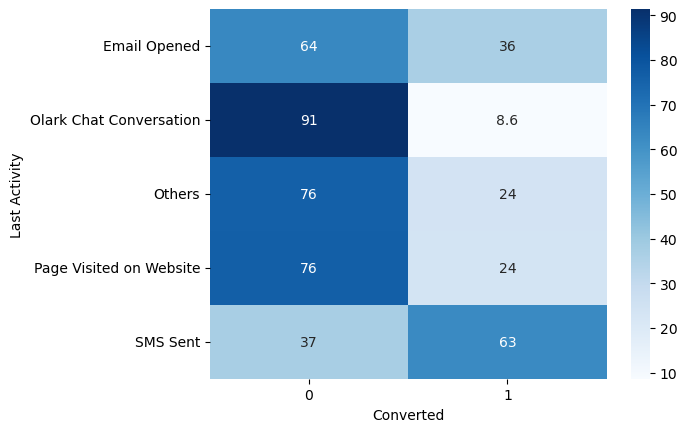

In [100]:
uni_cat("Last Activity","Converted")

### **Specialization**

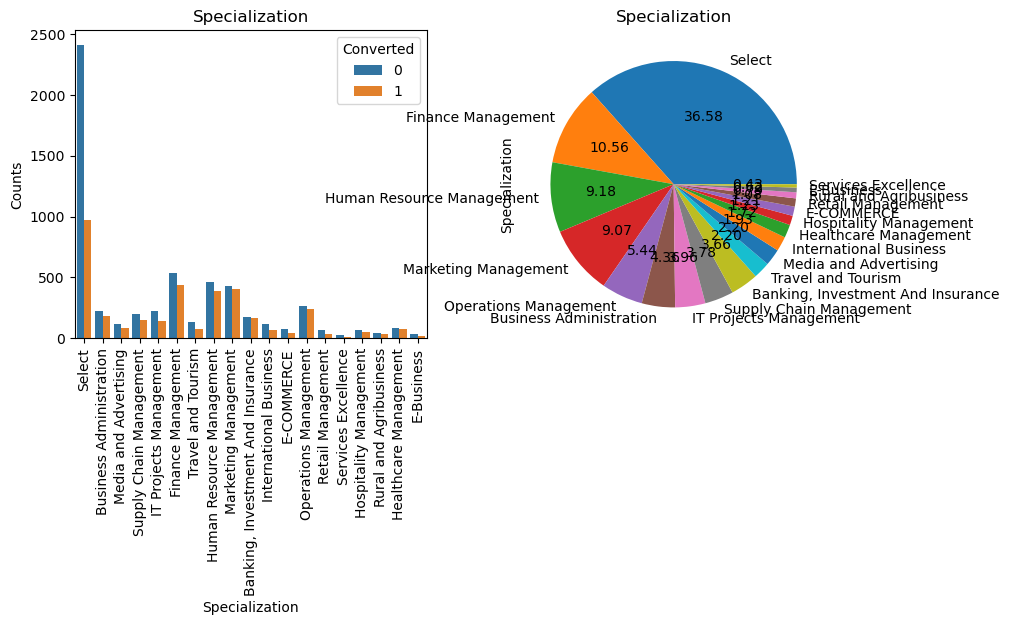

Category Wise % Counts


Select                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

Converted,0,1
Specialization,,
"Banking, Investment And Insurance",50.59,49.41
Business Administration,55.58,44.42
E-Business,63.16,36.84
E-COMMERCE,64.29,35.71
Finance Management,55.33,44.67
Healthcare Management,50.31,49.69
Hospitality Management,57.89,42.11
Human Resource Management,54.25,45.75
IT Projects Management,61.75,38.25


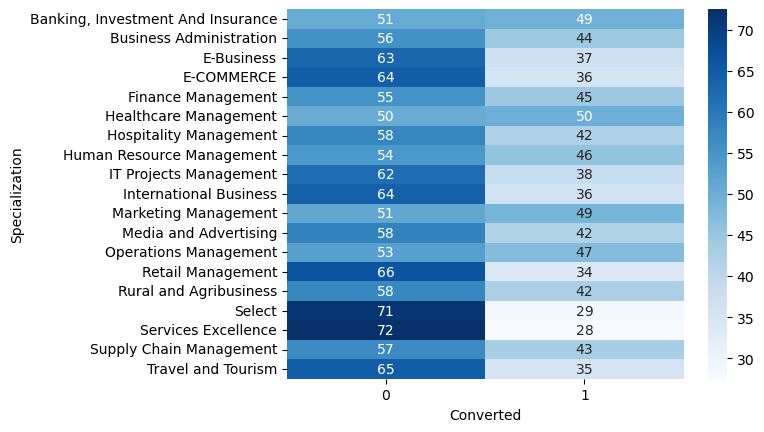

In [101]:
uni_cat("Specialization","Converted")

**Observation :-**
1. There are many values with count less than 5% . These values with value count <6% can be clubbed to catagory "Others"
2. Category "Select" is very high compared to other categories . This category has highest negative rate compared to others.
3. Detail missing in category ("Select") can be significant factor to indicate that lead will turn negative

In [102]:
# Club all catagories with  value count <6% to "Others" category

#1. Store value count % in panda series
x =(data["Specialization"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<6].index.tolist()

#3. Replace all catagories in dataframe with others
data["Specialization"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["Specialization"].value_counts()*100/len(data)

Select                       36.580087
Others                       34.610390
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Name: Specialization, dtype: float64

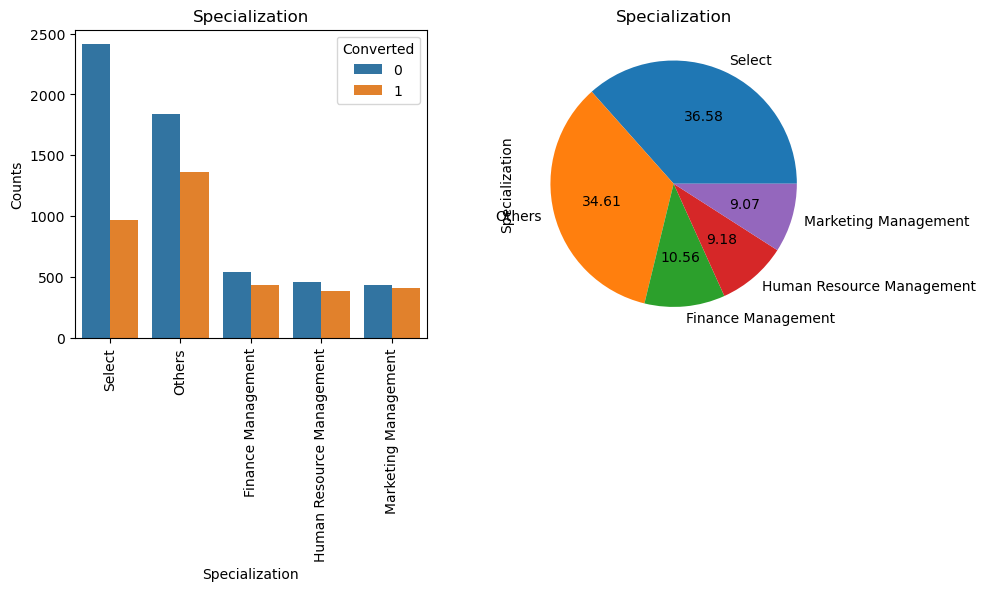

Category Wise % Counts


Select                       36.580087
Others                       34.610390
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Name: Specialization, dtype: float64

Converted,0,1
Specialization,,
Finance Management,55.33,44.67
Human Resource Management,54.25,45.75
Marketing Management,51.31,48.69
Others,57.47,42.53
Select,71.33,28.67


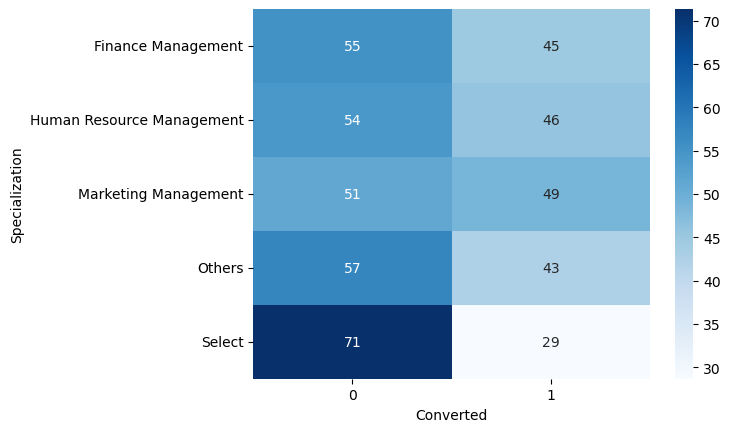

In [103]:
uni_cat("Specialization","Converted")

### **XEDU_Ref**

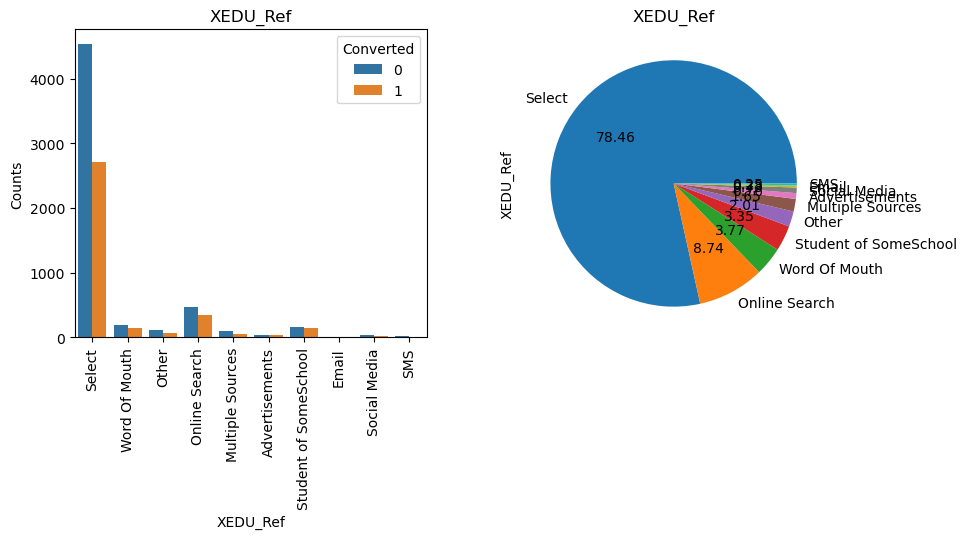

Category Wise % Counts


Select                   78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: XEDU_Ref, dtype: float64

Converted,0,1
XEDU_Ref,,
Advertisements,54.29,45.71
Email,50.00,50.00
Multiple Sources,63.16,36.84
Online Search,57.55,42.45
Other,59.68,40.32
SMS,78.26,21.74
Select,62.57,37.43
Social Media,58.21,41.79
Student of SomeSchool,53.87,46.13


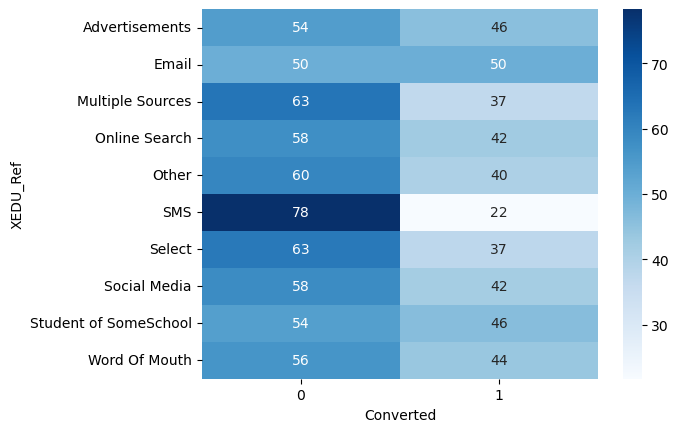

In [104]:
uni_cat("XEDU_Ref","Converted")

**Observation**
1. Majority of leads have "Select Value " i.e. missing 
2. This Column does not seem to be important
3. Replace values other than "Select" to "Others"

In [105]:
# Club all catagories with  value count <6% to "Others" category

#1. Store value count % in panda series
x =(data["XEDU_Ref"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<6].index.tolist()

#3. Replace all catagories in dataframe with others
data["XEDU_Ref"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["XEDU_Ref"].value_counts()*100/len(data)

Select           78.463203
Others           12.792208
Online Search     8.744589
Name: XEDU_Ref, dtype: float64

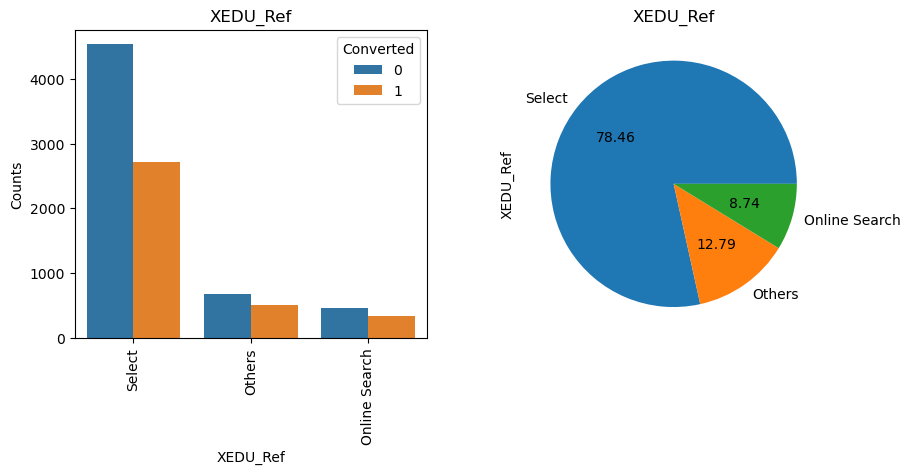

Category Wise % Counts


Select           78.463203
Others           12.792208
Online Search     8.744589
Name: XEDU_Ref, dtype: float64

Converted,0,1
XEDU_Ref,,
Online Search,57.55,42.45
Others,57.36,42.64
Select,62.57,37.43


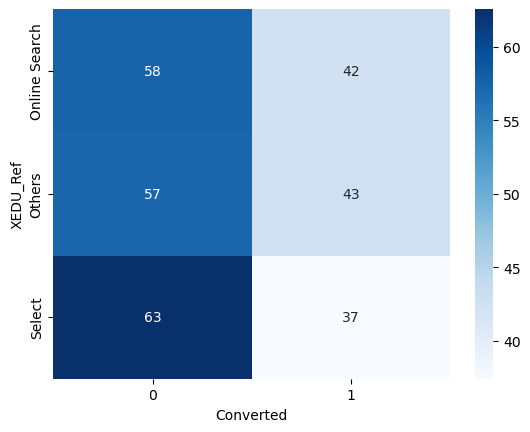

In [106]:
uni_cat("XEDU_Ref","Converted")

### **Occupation**

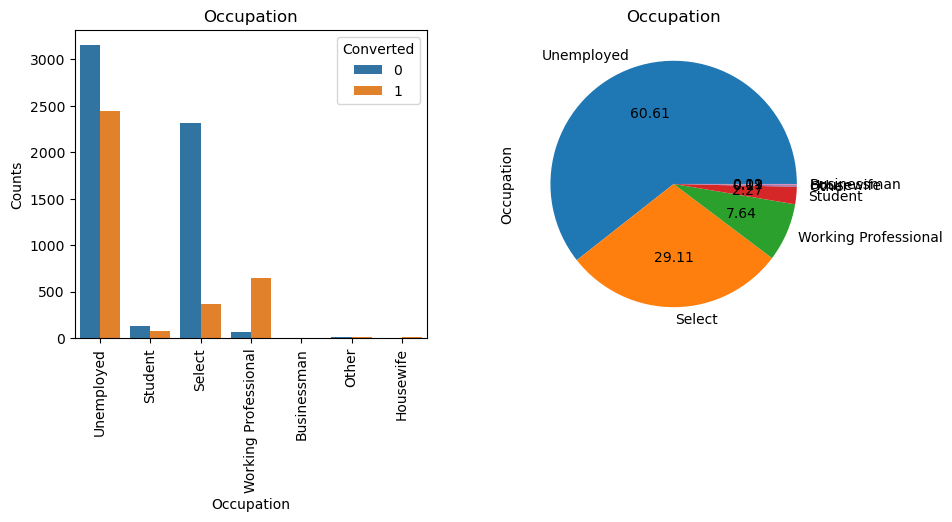

Category Wise % Counts


Unemployed              60.606061
Select                  29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

Converted,0,1
Occupation,,
Businessman,37.50,62.50
Housewife,0.00,100.00
Other,37.50,62.50
Select,86.25,13.75
Student,62.86,37.14
Unemployed,56.41,43.59
Working Professional,8.36,91.64


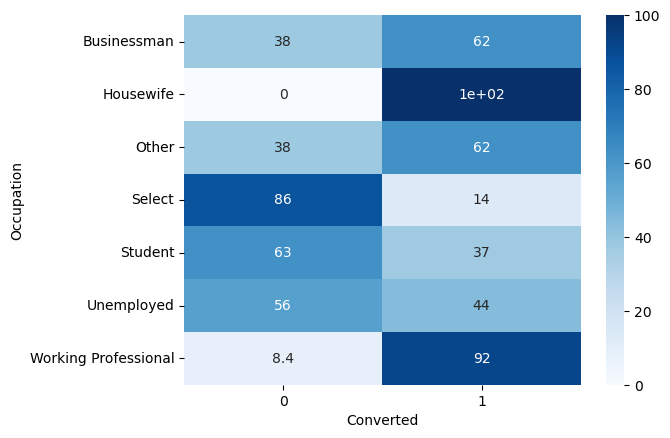

In [107]:
uni_cat("Occupation","Converted")

**Observation**
1. "Majority of Leads are "Unemployed" 
2. When Occupation is missing ("Select") probability of lead conversion to negative is very high
3. When Occupation is "Working Professional" probability of lead conversion to positive is very high


### **Reason_course_select**

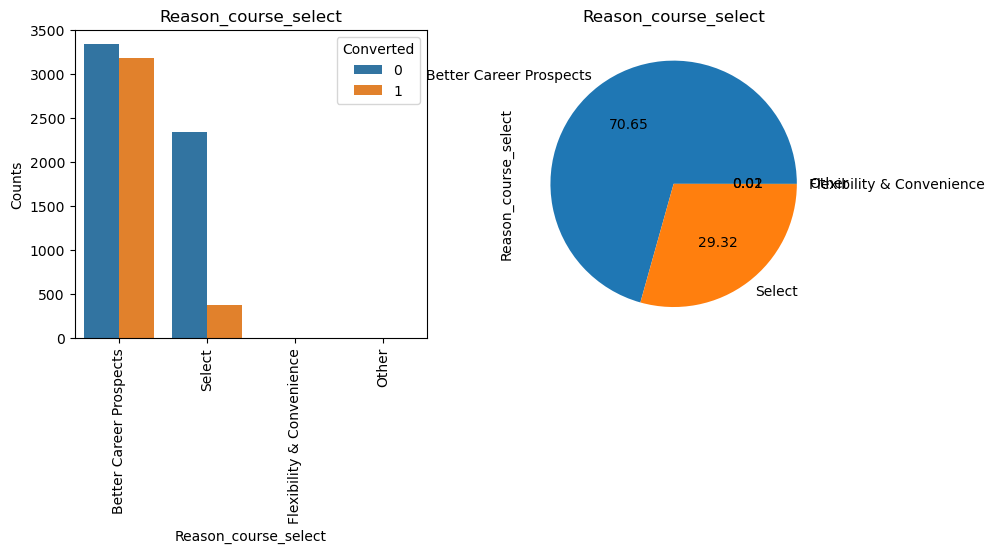

Category Wise % Counts


Better Career Prospects      70.649351
Select                       29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: Reason_course_select, dtype: float64

Converted,0,1
Reason_course_select,,
Better Career Prospects,51.13,48.87
Flexibility & Convenience,50.00,50.00
Other,100.00,0.00
Select,86.34,13.66


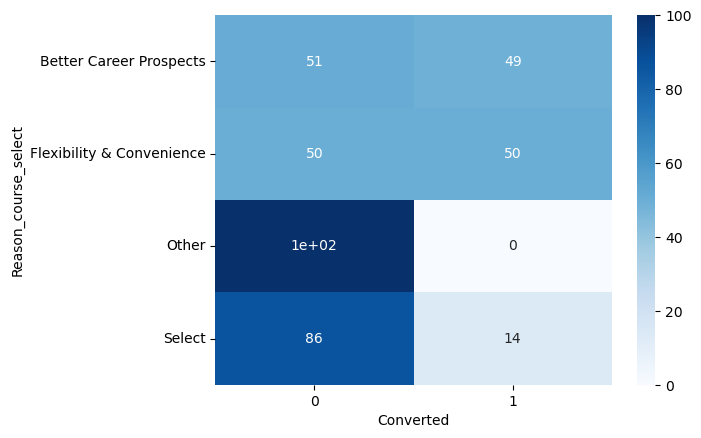

In [108]:
uni_cat("Reason_course_select","Converted")

**Observation:-**
1. "Reason_course_select" with missing value (Select) has probabiity of lead converting to negative is very high
2. "Category with small % can be converted to "Others"

In [109]:
# Club all catagories with  value count <6% to "Others" category

#1. Store value count % in panda series
x =(data["Reason_course_select"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<2].index.tolist()

#3. Replace all catagories in dataframe with others
data["Reason_course_select"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["Reason_course_select"].value_counts()*100/len(data)

Better Career Prospects    70.649351
Select                     29.318182
Others                      0.032468
Name: Reason_course_select, dtype: float64

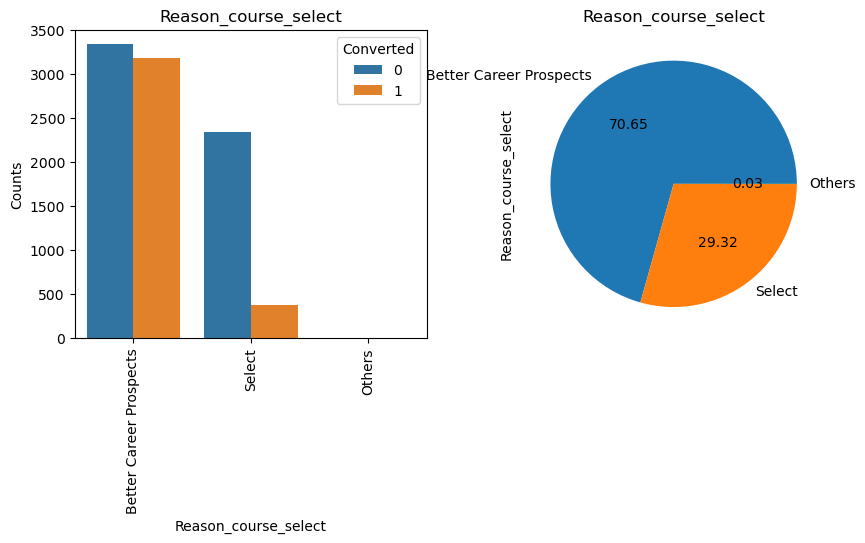

Category Wise % Counts


Better Career Prospects    70.649351
Select                     29.318182
Others                      0.032468
Name: Reason_course_select, dtype: float64

Converted,0,1
Reason_course_select,,
Better Career Prospects,51.13,48.87
Others,66.67,33.33
Select,86.34,13.66


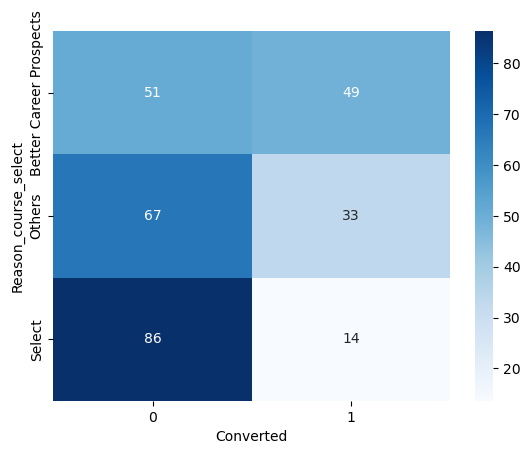

In [110]:
uni_cat("Reason_course_select","Converted")

### **Search**

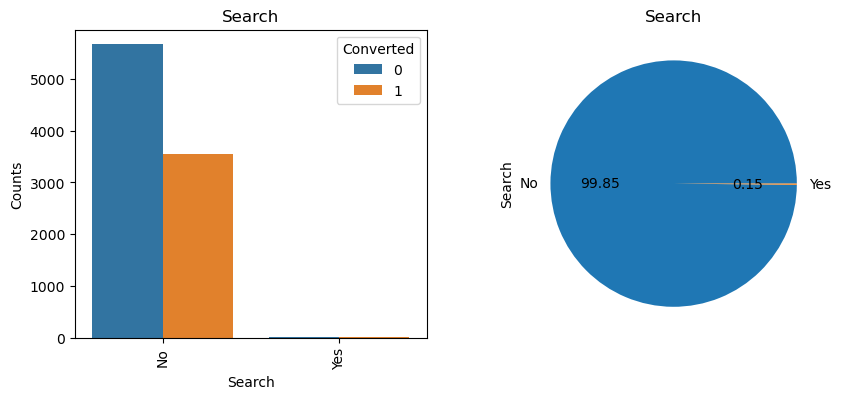

Category Wise % Counts


No     99.848485
Yes     0.151515
Name: Search, dtype: float64

Converted,0,1
Search,,
No,61.46,38.54
Yes,64.29,35.71


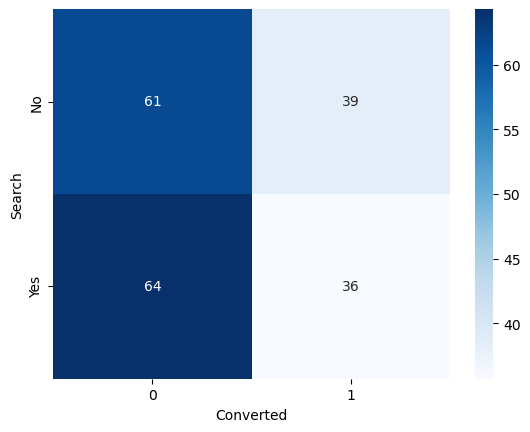

In [111]:
uni_cat("Search","Converted")

**Observation :-**
1. Most of the values are No so this column does not seem useful for analysis and can be dropped

In [112]:
#Drop "Search" Column
data.drop(columns="Search",axis=1,inplace=True)

### **Magazine**

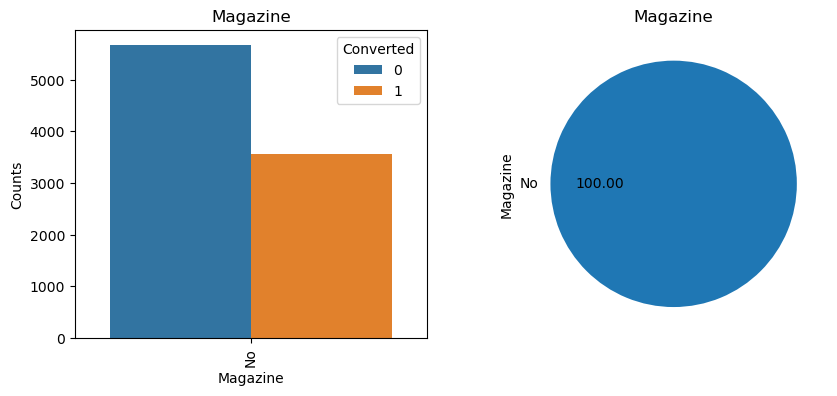

Category Wise % Counts


No    100.0
Name: Magazine, dtype: float64

Converted,0,1
Magazine,,
No,61.46,38.54


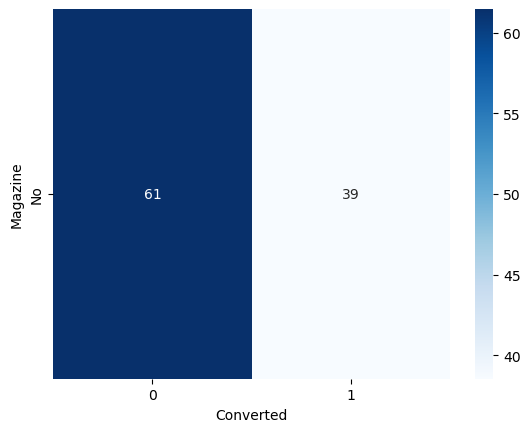

In [113]:
uni_cat("Magazine","Converted")

**Observation :-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [114]:
#Drop "Magazine" Column
data.drop(columns="Magazine",axis=1,inplace=True)

### **News_Article**

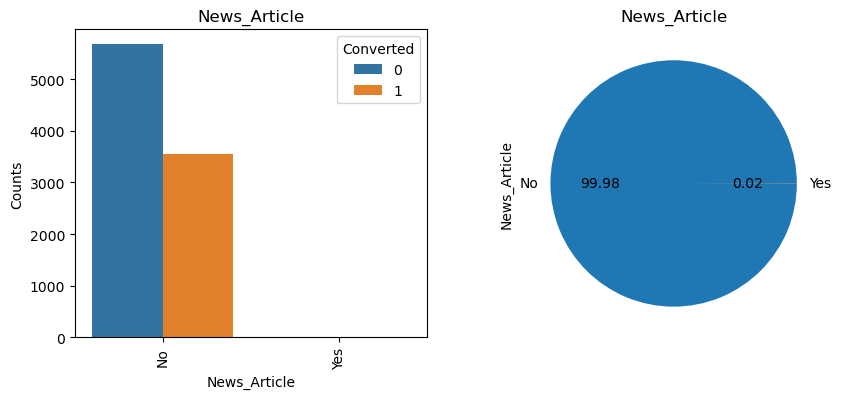

Category Wise % Counts


No     99.978355
Yes     0.021645
Name: News_Article, dtype: float64

Converted,0,1
News_Article,,
No,61.46,38.54
Yes,50.00,50.00


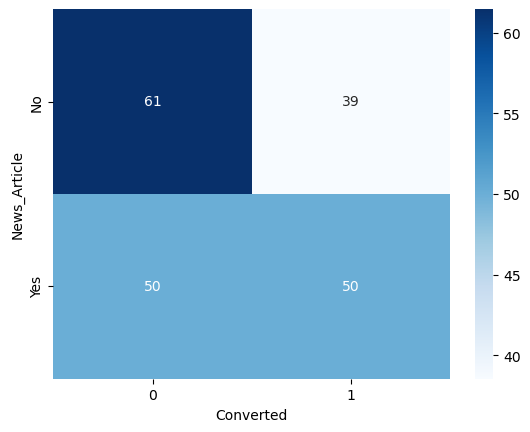

In [115]:
uni_cat("News_Article","Converted")

**Observation :-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [116]:
#Drop "Magazine" Column
data.drop(columns="News_Article",axis=1,inplace=True)

### **X_Forum**

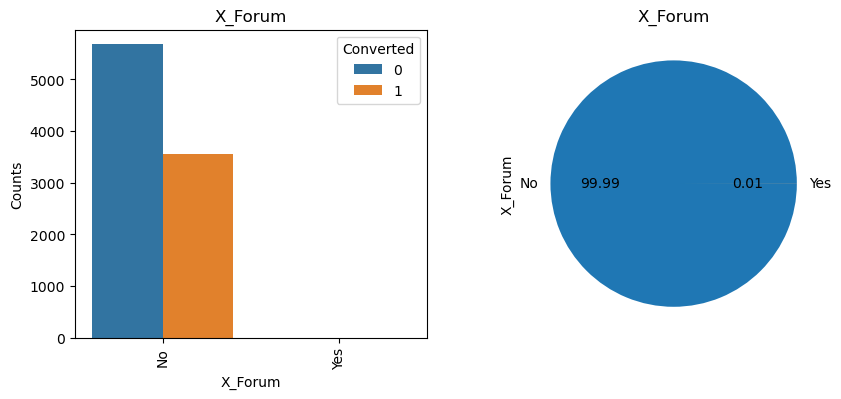

Category Wise % Counts


No     99.989177
Yes     0.010823
Name: X_Forum, dtype: float64

Converted,0,1
X_Forum,,
No,61.46,38.54
Yes,100.00,0.00


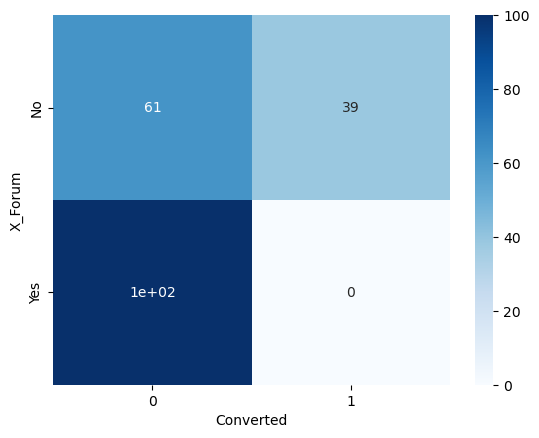

In [117]:
uni_cat("X_Forum","Converted")

**Observation :-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [118]:
#Drop "X_Forum" Column
data.drop(columns="X_Forum",axis=1,inplace=True)

### **Newspaper**

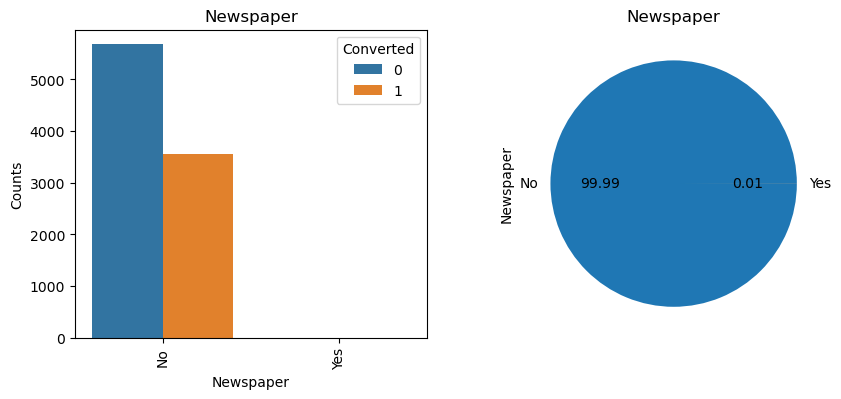

Category Wise % Counts


No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

Converted,0,1
Newspaper,,
No,61.46,38.54
Yes,100.00,0.00


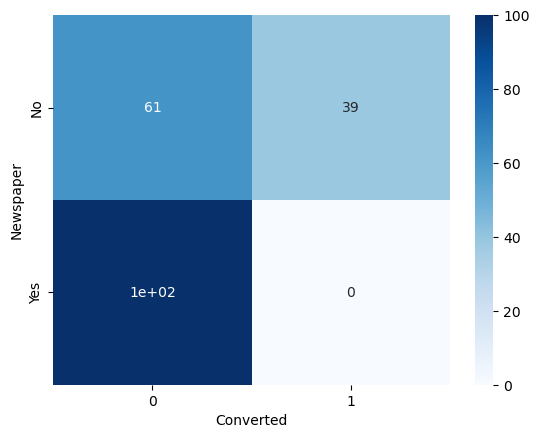

In [119]:
uni_cat("Newspaper","Converted")

**Observation :-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [120]:
#Drop "X_Forum" Column
data.drop(columns="Newspaper",axis=1,inplace=True)

### **Digi_Adv**

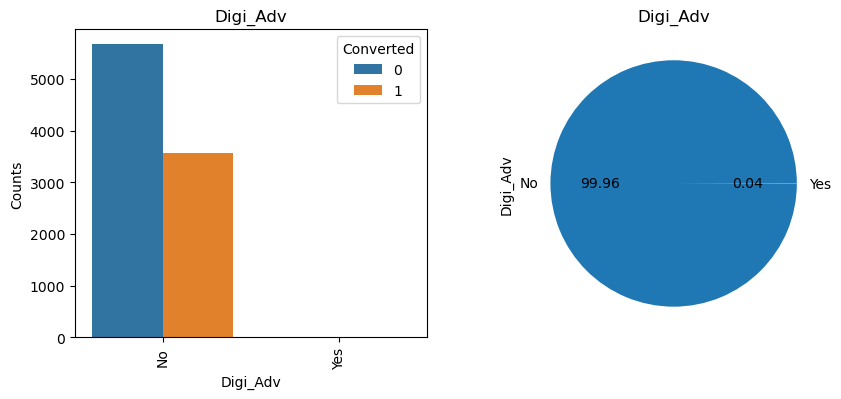

Category Wise % Counts


No     99.95671
Yes     0.04329
Name: Digi_Adv, dtype: float64

Converted,0,1
Digi_Adv,,
No,61.46,38.54
Yes,75.00,25.00


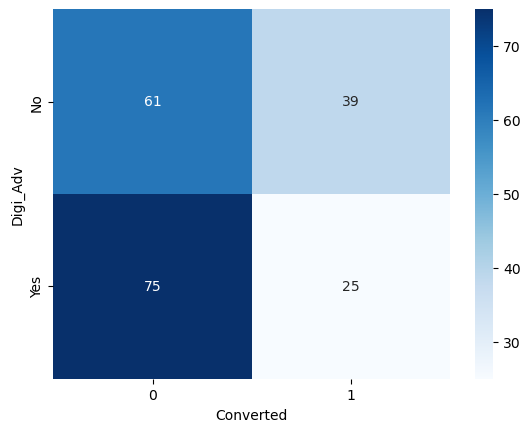

In [121]:
uni_cat("Digi_Adv","Converted")

**Observation:-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [122]:
#Drop "Digi_Adv" Column
data.drop(columns="Digi_Adv",axis=1,inplace=True)

### **Through Recommendation**

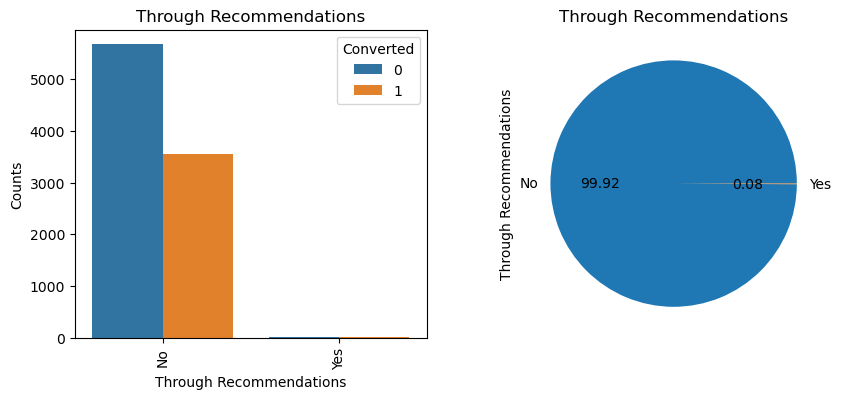

Category Wise % Counts


No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

Converted,0,1
Through Recommendations,,
No,61.49,38.51
Yes,28.57,71.43


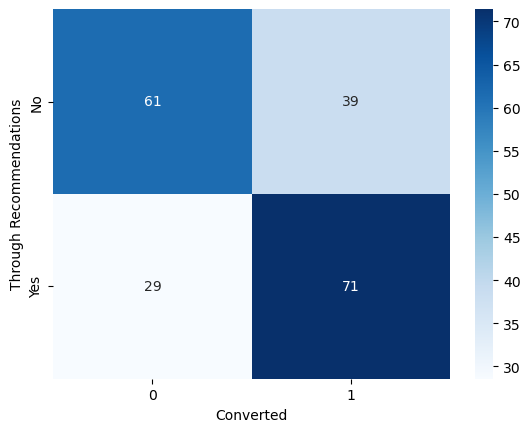

In [123]:
uni_cat("Through Recommendations","Converted")

**Observation :-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [124]:
#Drop "Through Recommendations" Column
data.drop(columns="Through Recommendations",axis=1,inplace=True)

### **updt_required**

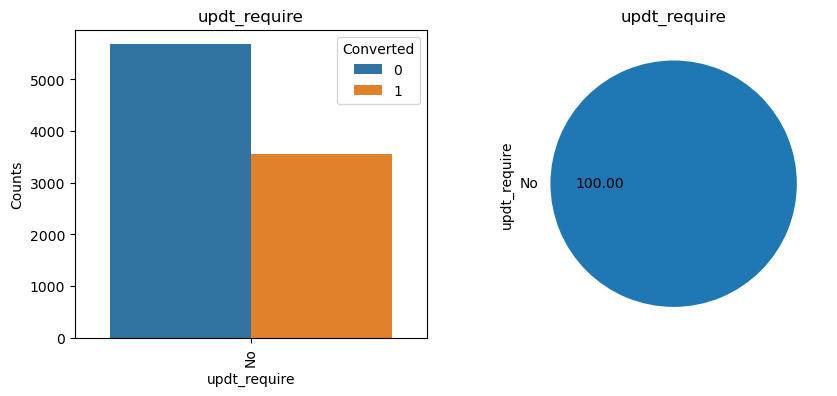

Category Wise % Counts


No    100.0
Name: updt_require, dtype: float64

Converted,0,1
updt_require,,
No,61.46,38.54


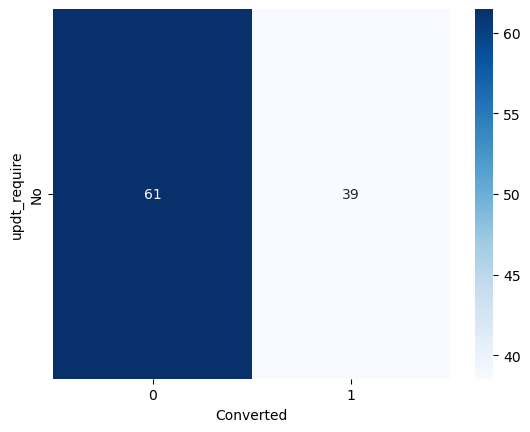

In [125]:
uni_cat("updt_require","Converted")

**Observation :-**
1. All the values are No so this column does not seem useful for analysis and can be dropped

In [126]:
#Drop "updt_require" Column
data.drop(columns="updt_require",axis=1,inplace=True)

### **Tags**

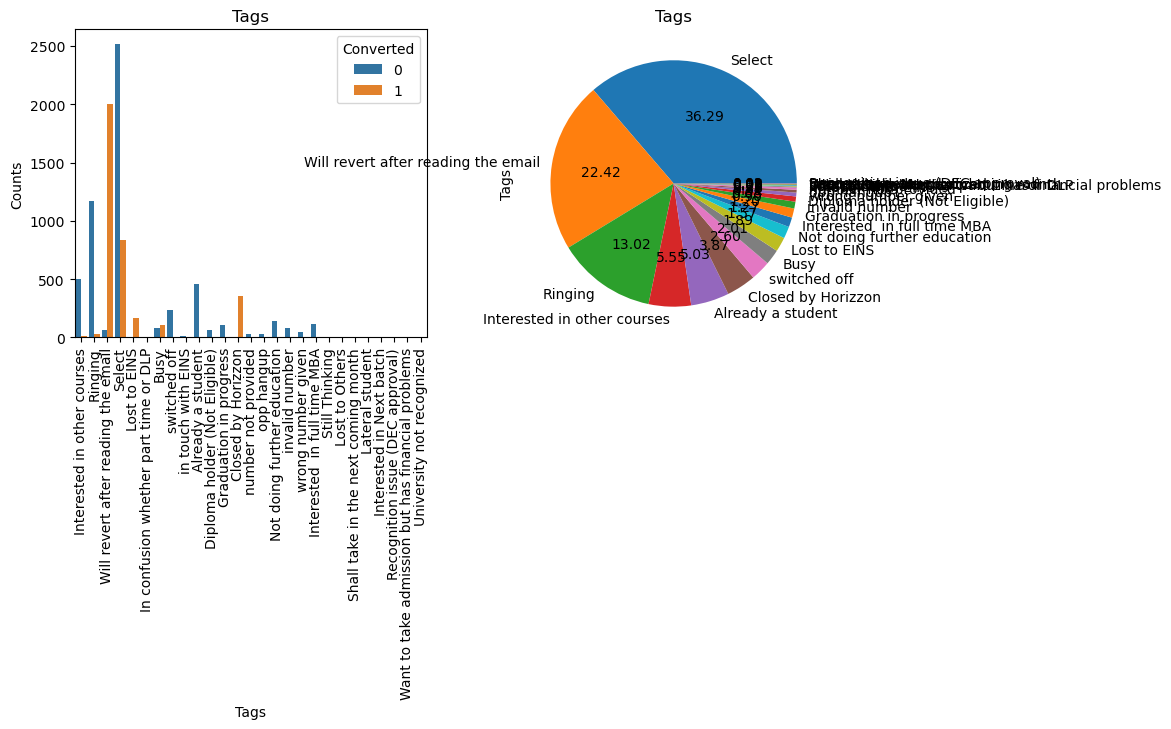

Category Wise % Counts


Select                                               36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

Converted,0,1
Tags,,
Already a student,99.35,0.65
Busy,43.55,56.45
Closed by Horizzon,0.56,99.44
Diploma holder (Not Eligible),98.41,1.59
Graduation in progress,93.69,6.31
In confusion whether part time or DLP,80.00,20.00
Interested in full time MBA,97.44,2.56
Interested in Next batch,0.00,100.00
Interested in other courses,97.47,2.53


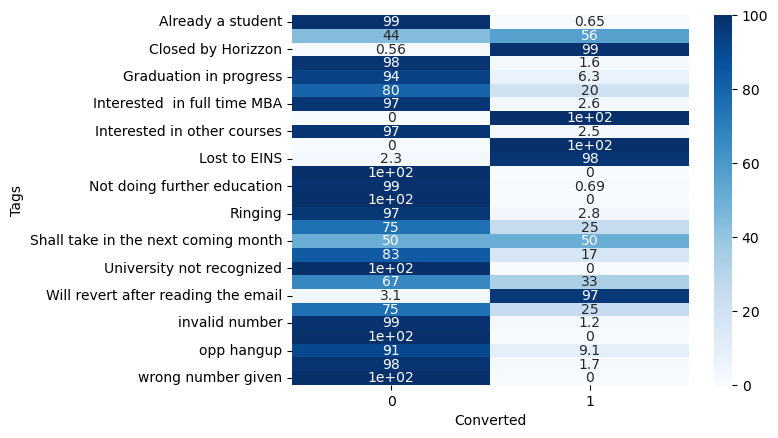

In [127]:
uni_cat("Tags","Converted")

**Observation :-** 
1. "Tags" with category "Select" i.e. missing is high compared to other categories . Probabiltiy of lead turning negative is high
2. "Tags" with category "Closed by Horizzon" or "Will revert after reading the email" have high probabiity of lead turning positive
3. "Tags" with category "Ringing" , probaility of lead turning negative is very high
4. Other Categories with count values less than 5% can be clubbed into "Others" category

In [128]:
# Club all catagories with  value count <6% to "Others" category

#1. Store value count % in panda series
x =(data["Tags"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<5].index.tolist()

#3. Replace all catagories in dataframe with others
data["Tags"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["Tags"].value_counts()*100/len(data)

Select                                 36.287879
Will revert after reading the email    22.424242
Others                                 17.683983
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64

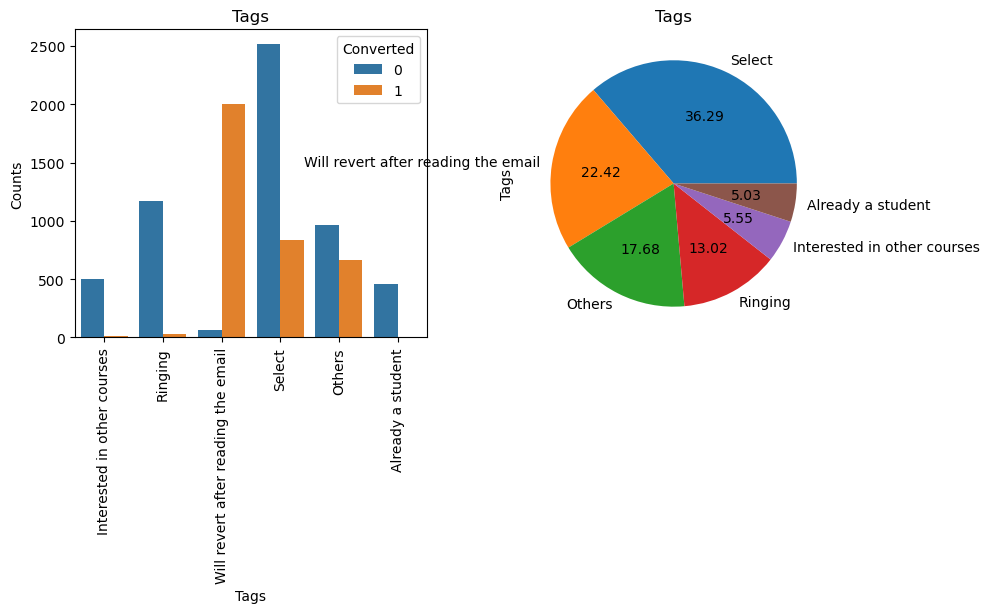

Category Wise % Counts


Select                                 36.287879
Will revert after reading the email    22.424242
Others                                 17.683983
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64

Converted,0,1
Tags,,
Already a student,99.35,0.65
Interested in other courses,97.47,2.53
Others,59.12,40.88
Ringing,97.17,2.83
Select,75.07,24.93
Will revert after reading the email,3.14,96.86


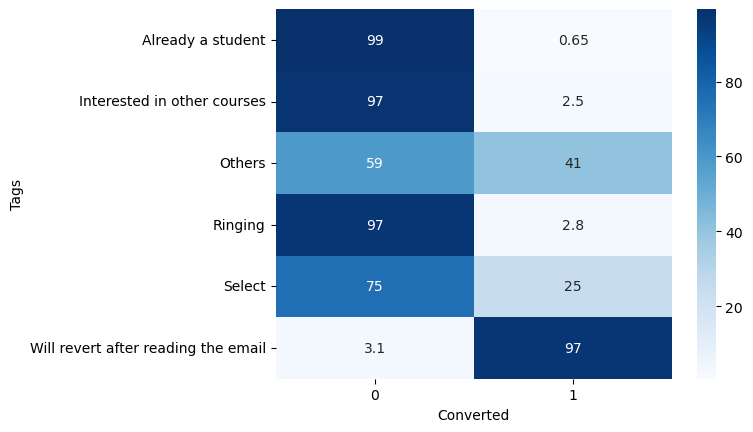

In [129]:
# Verify changes
uni_cat("Tags","Converted")

### **Lead Quality**

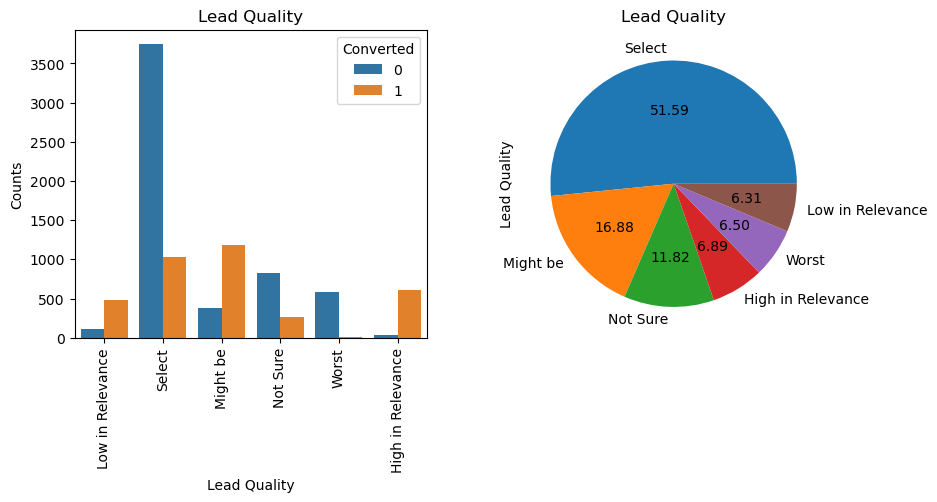

Category Wise % Counts


Select               51.590909
Might be             16.883117
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

Converted,0,1
Lead Quality,,
High in Relevance,5.34,94.66
Low in Relevance,18.18,81.82
Might be,24.42,75.58
Not Sure,75.64,24.36
Select,78.52,21.48
Worst,98.00,2.00


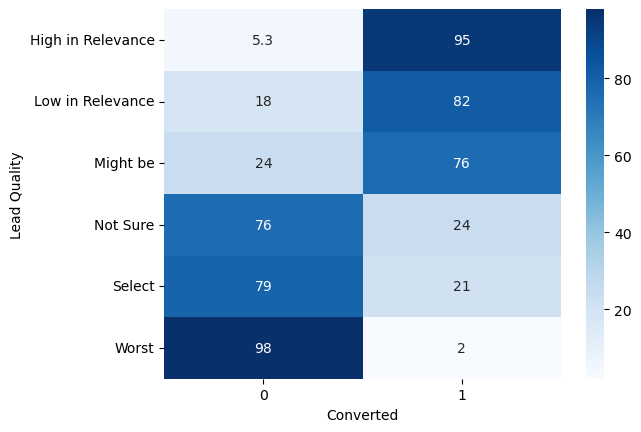

In [130]:
uni_cat("Lead Quality","Converted")

**Observation:-**
1. There are High Number of records with "Lead Quality" category "Select" i.e. value is missing . Probability of lead turning negative is high if "Lead Quality" value is "Select" i.e missing
2. For "Lead Quality" category "Not Sure" or "Worst" ,probabitlity of lead turning negative are high 
3. If "Lead Quality" values are "High in Relevance" ,"Low in Relevance", "Might be" - probability of lead turning positive is high

### updt_SCcontent

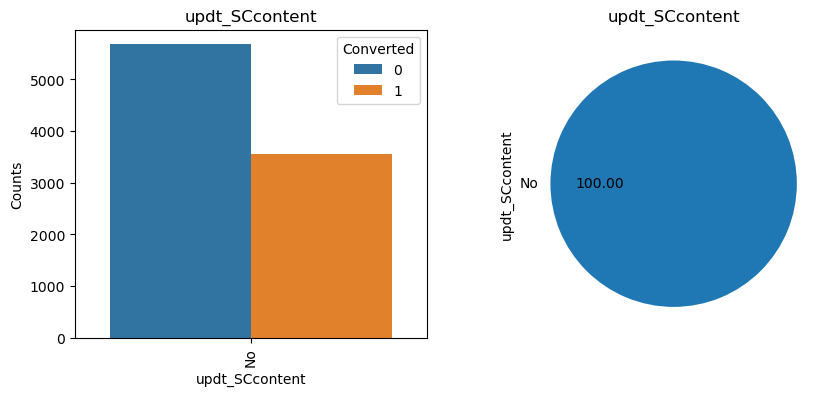

Category Wise % Counts


No    100.0
Name: updt_SCcontent, dtype: float64

Converted,0,1
updt_SCcontent,,
No,61.46,38.54


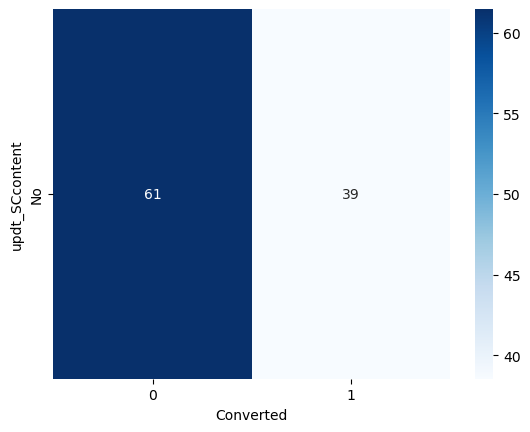

In [131]:
uni_cat("updt_SCcontent","Converted")

**Observation :-**
1. For all records "updt_SCcontent" is "No" so this does not seems to be factor important for analysis and can be excluded from analysis


In [132]:
# Drop "Chq_pymnt" column
data.drop(columns="updt_SCcontent",axis=1,inplace=True)

### **updt_DM**

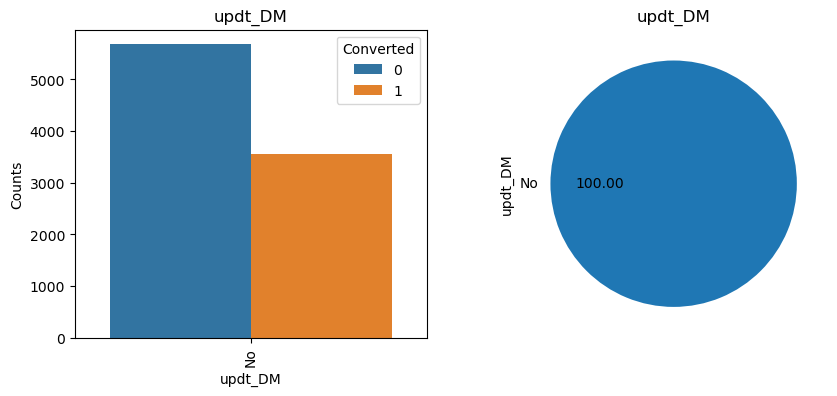

Category Wise % Counts


No    100.0
Name: updt_DM, dtype: float64

Converted,0,1
updt_DM,,
No,61.46,38.54


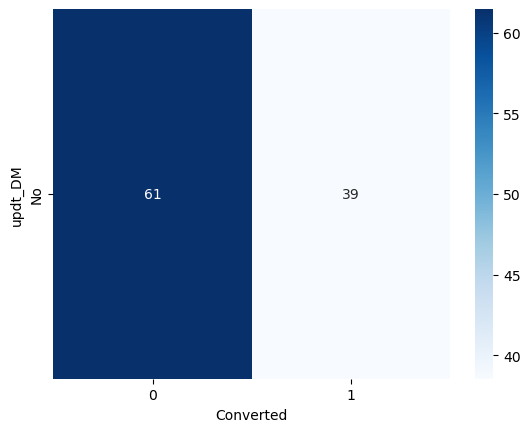

In [133]:
uni_cat("updt_DM","Converted")

**Observation :-**
1. For all records "updt_DM" is "No" so this does not seems to be factor important for analysis and can be excluded from analysis


In [134]:
# Drop "Chq_pymnt" column
data.drop(columns="updt_DM",axis=1,inplace=True)

### **Chq_pymnt**

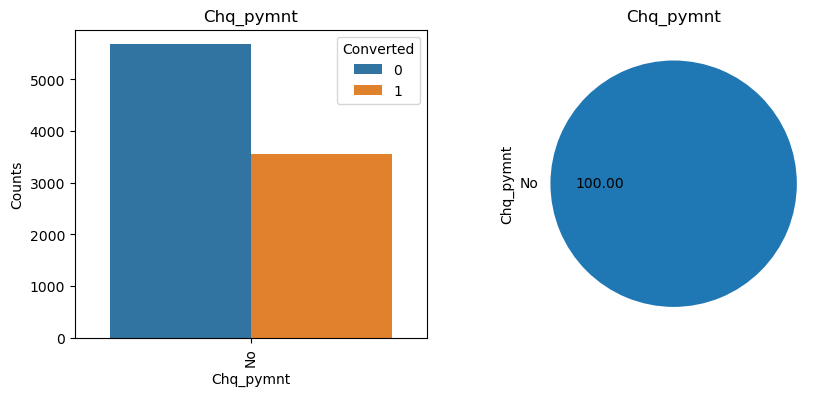

Category Wise % Counts


No    100.0
Name: Chq_pymnt, dtype: float64

Converted,0,1
Chq_pymnt,,
No,61.46,38.54


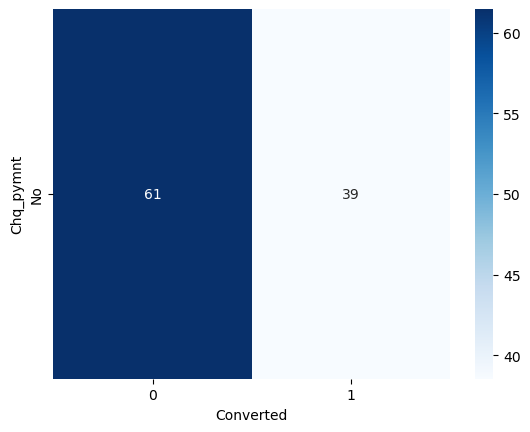

In [135]:
uni_cat("Chq_pymnt","Converted")

**Observation :-**
1. For all records "Chq_pymnt" is "No" so this does not seems to be factor important for analysis and can be excluded from analysis


In [136]:
# Drop "Chq_pymnt" column
data.drop(columns="Chq_pymnt",axis=1,inplace=True)

### **Free_copy**

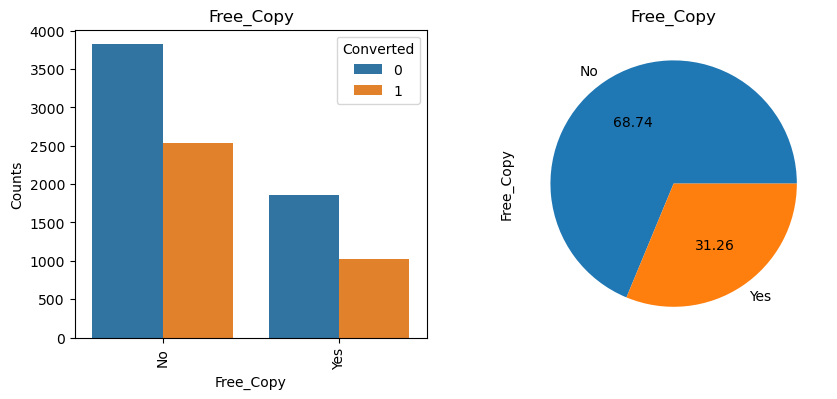

Category Wise % Counts


No     68.744589
Yes    31.255411
Name: Free_Copy, dtype: float64

Converted,0,1
Free_Copy,,
No,60.15,39.85
Yes,64.34,35.66


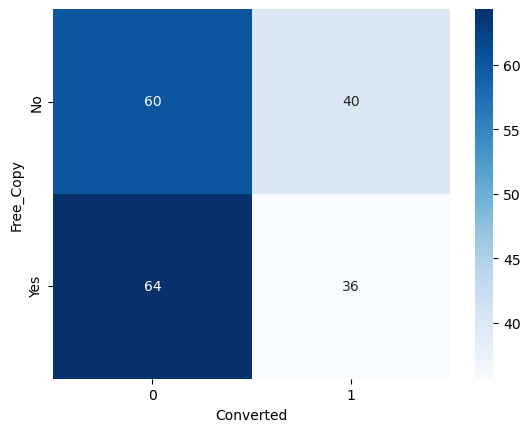

In [137]:

uni_cat("Free_Copy","Converted")

**Observation:-**
1. Distribution of positive lead and negative lead for both "Free_Copy" - "Yes" or "No" is almost similar so this does not seem to be contributing factor 
2. Values of "Yes" ,"No" can be converted to 1 ,0 respectively for further analysis

In [138]:
# Convert Yes/No to 1/0
data["Free_Copy"].replace(["Yes","No"],[1,0],inplace=True)


In [139]:
data.columns

Index(['Lead Origin', 'Lead Source', 'DN_Email', 'Converted', 'TotalVisits',
       'Web_Time', 'Page_per_visit', 'Last Activity', 'Specialization',
       'XEDU_Ref', 'Occupation', 'Reason_course_select', 'Tags',
       'Lead Quality', 'Free_Copy', 'Notable_Activity'],
      dtype='object')

### **Notable_Activity**

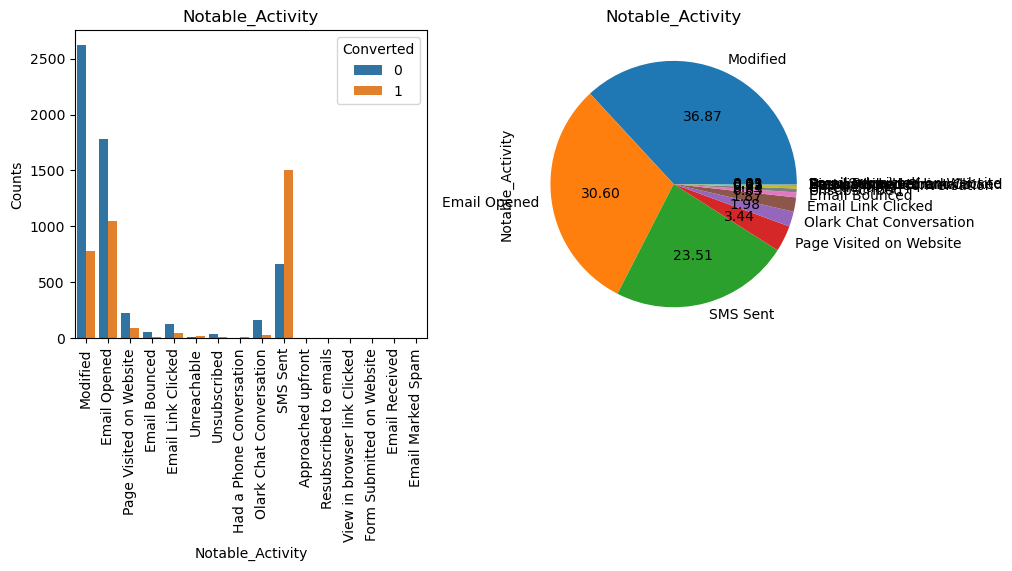

Category Wise % Counts


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Notable_Activity, dtype: float64

Converted,0,1
Notable_Activity,,
Approached upfront,0.00,100.00
Email Bounced,85.00,15.00
Email Link Clicked,73.99,26.01
Email Marked Spam,0.00,100.00
Email Opened,63.07,36.93
Email Received,0.00,100.00
Form Submitted on Website,100.00,0.00
Had a Phone Conversation,7.14,92.86
Modified,77.02,22.98


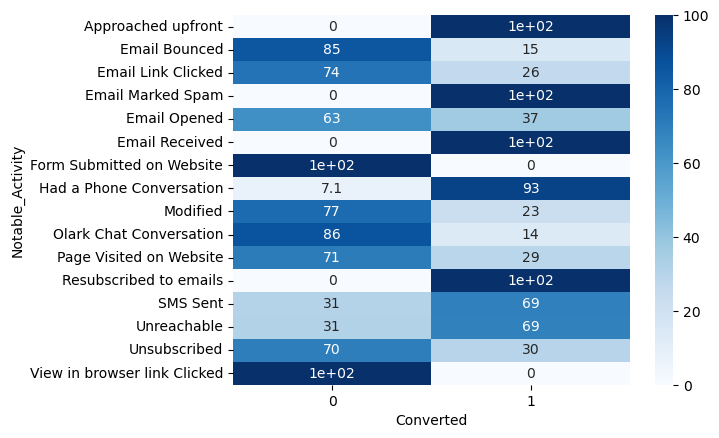

In [140]:
uni_cat("Notable_Activity","Converted")

**Observation:-**
1. "Notable_Activity" catagory "modefied" has higher % of negative leads compared to % of positive lead. 
2. "Notable_Activity" categroy "SMS Sent" has higher % of positive leads compared to % of negative lead.
3. "Category with small % can be converted to "Others"
4. "Notable_Activity" status "modefied" has high chances of lead turning negative while "Notable_Activity" status "SMS Sent" has high chances of lead turning pusitive

In [141]:
# Club all catagories with  value count <5% to "Others" category
#1. Store value count % in panda series
x =(data["Notable_Activity"].value_counts()*100/len(data))

#2. Store all catagories to list with value count < 6
x_list=x.loc[lambda x:x<5].index.tolist()

#3. Replace all catagories in dataframe with others
data["Notable_Activity"].replace(x_list,"Others",inplace=True)

#4. Verify Changes
data["Notable_Activity"].value_counts()*100/len(data)

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Notable_Activity, dtype: float64

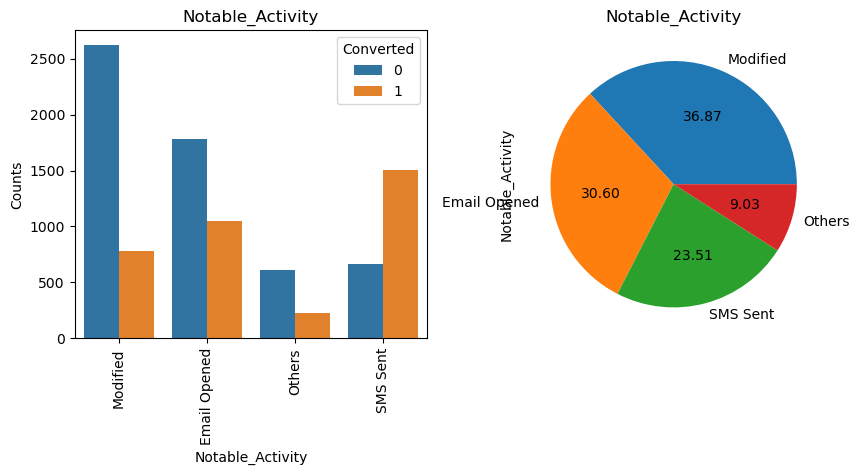

Category Wise % Counts


Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Notable_Activity, dtype: float64

Converted,0,1
Notable_Activity,,
Email Opened,63.07,36.93
Modified,77.02,22.98
Others,72.90,27.10
SMS Sent,30.57,69.43


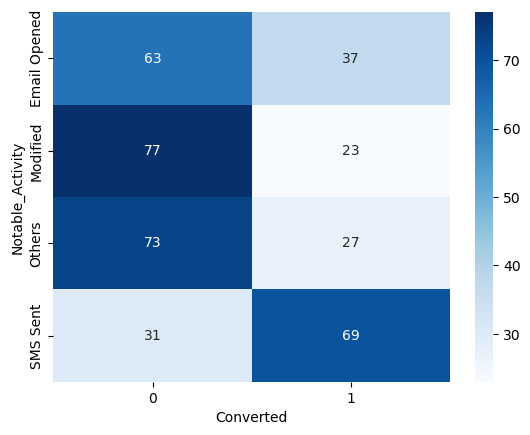

In [142]:
uni_cat("Notable_Activity","Converted")

## **Univariate Analysis -Numerical Columns**


In [143]:
num_col

['TotalVisits', 'Web_Time', 'Page_per_visit']

### **TotalVisits**

In [144]:
# Staistical Information on TotalVisits
data["TotalVisits"].describe(percentiles=[0.25,0.75,0.9,0.99,0.999])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
99.9%      31.522000
max       251.000000
Name: TotalVisits, dtype: float64

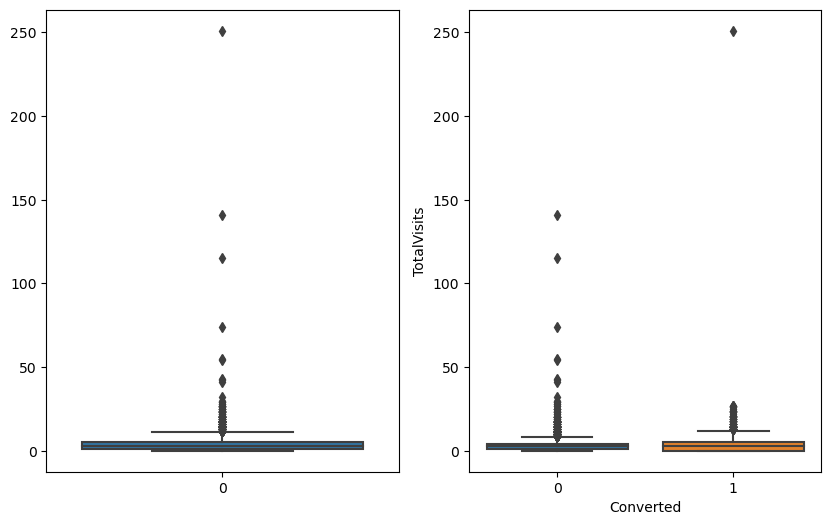

In [145]:
# Box Plot for data distribution
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(data["TotalVisits"])
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Converted",y="TotalVisits")
plt.show()

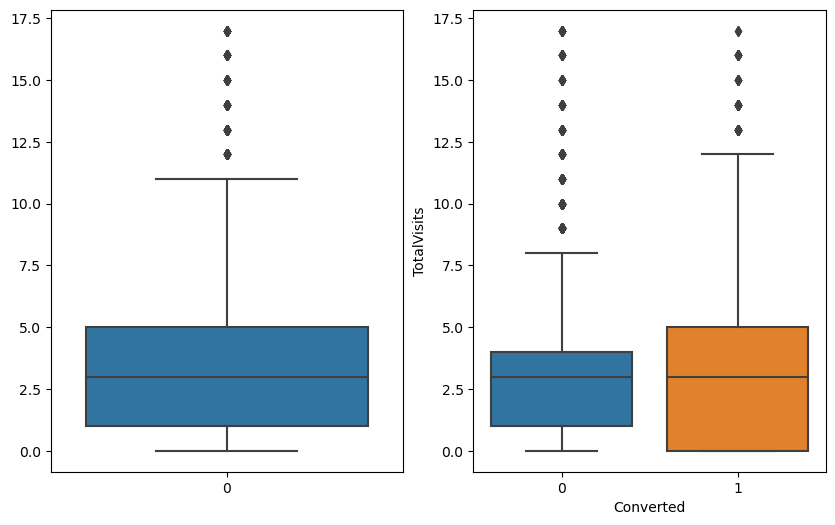

Statistical Summary :Converted =0


count    5632.000000
mean        3.101030
std         2.865031
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: TotalVisits, dtype: float64

Statistical Summary :Converted =1


count    3525.000000
mean        3.368227
std         3.118272
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [146]:
# Box plot after removing outliers (removing data > 99.9 percentile)

plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
data_rev = data[data["TotalVisits"] <= data["TotalVisits"].quantile(0.99)]

sns.boxplot(data_rev["TotalVisits"])
plt.subplot(1,2,2)
sns.boxplot(data=data_rev,x="Converted",y="TotalVisits")
plt.show()

print("Statistical Summary :Converted =0")
display(data_rev[data_rev["Converted"]==0]["TotalVisits"].describe())
print("Statistical Summary :Converted =1")
display(data_rev[data_rev["Converted"]==1]["TotalVisits"].describe())


<Axes: xlabel='TotalVisits', ylabel='Count'>

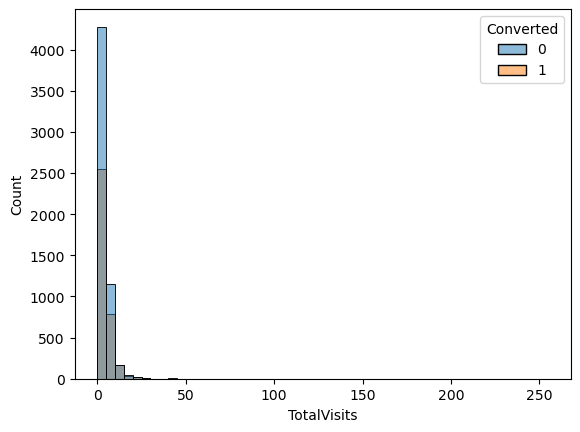

In [147]:
sns.histplot(data=data,x="TotalVisits",hue="Converted",binwidth=5)

**Observation :-**
1. 99% of leads have "TotalVisit" less than 17. There are few records with very high values which can be considered outlier
2. Median value of "TotalVisits" for both negative and positve leads are same .
3. For Positive Leads ; range of values above median are high while for Negative Leads ;range of values below median is high . This shows positive correlation between "TotalVisits" and "Lead Conversion"
4. Outliers value above 99 percentile values to be replaced with 99 percentile value


In [148]:
data["TotalVisits"]=data["TotalVisits"].apply(lambda x: data["TotalVisits"].quantile(0.99) if x > data["TotalVisits"].quantile(0.99) else x)

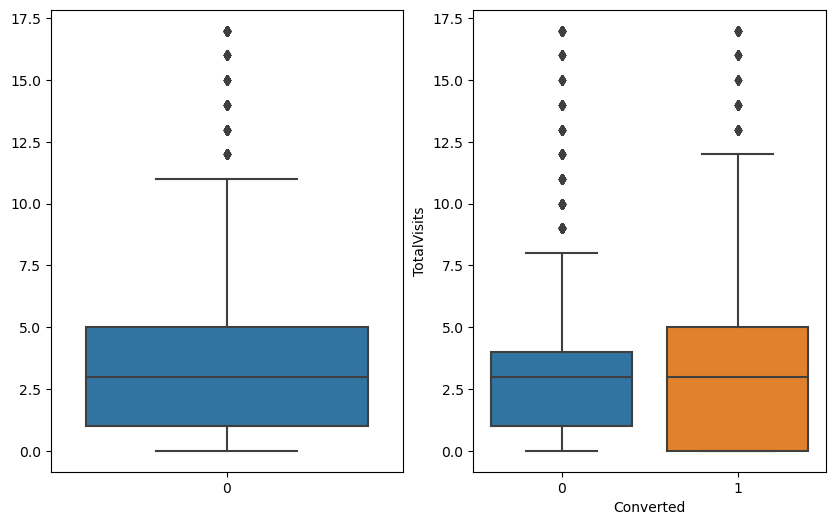

In [149]:
# Verify Chages
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(data["TotalVisits"])
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Converted",y="TotalVisits")
plt.show()


In [150]:
num_col

['TotalVisits', 'Web_Time', 'Page_per_visit']

### **Web_Time**

In [151]:
# Staistical Information on Web_Time
data["Web_Time"].describe(percentiles=[0.25,0.75,0.9,0.99,0.999])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
99%      1840.610000
99.9%    2115.805000
max      2272.000000
Name: Web_Time, dtype: float64

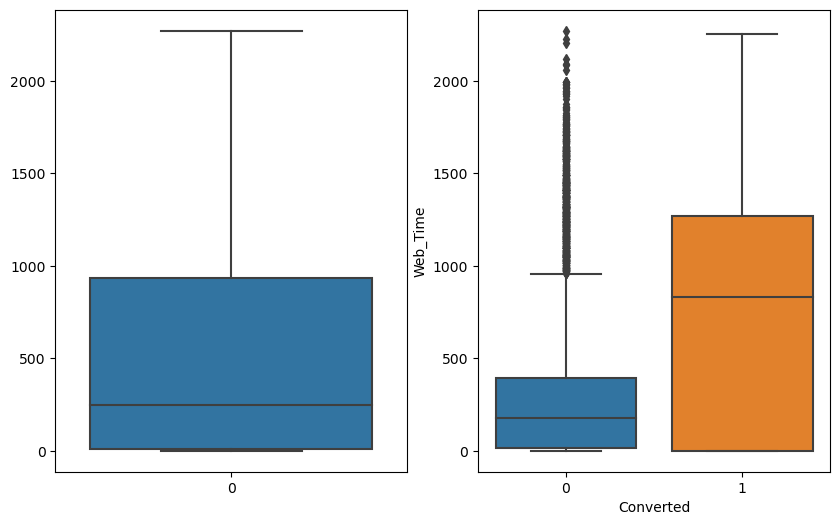

In [152]:
# Box Plot for data distribution
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(data["Web_Time"])
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Converted",y="Web_Time")
plt.show()

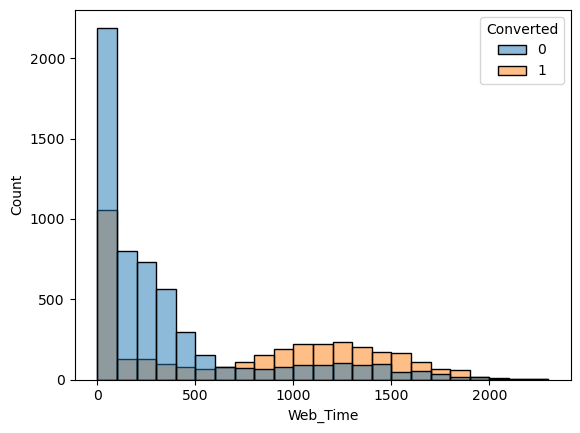

In [153]:
sns.histplot(data=data,x="Web_Time",hue="Converted",binwidth=100)
plt.show()

**Oberrvation :-**
1. Higher the web activity time (>500) probaility of positive lead increases . 

In [154]:
num_col

['TotalVisits', 'Web_Time', 'Page_per_visit']

### **Page_per_visit**

In [155]:
# Staistical Information on Web_Time
data["Page_per_visit"].describe(percentiles=[0.25,0.75,0.9,0.99,0.999])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
99.9%      14.380500
max        55.000000
Name: Page_per_visit, dtype: float64

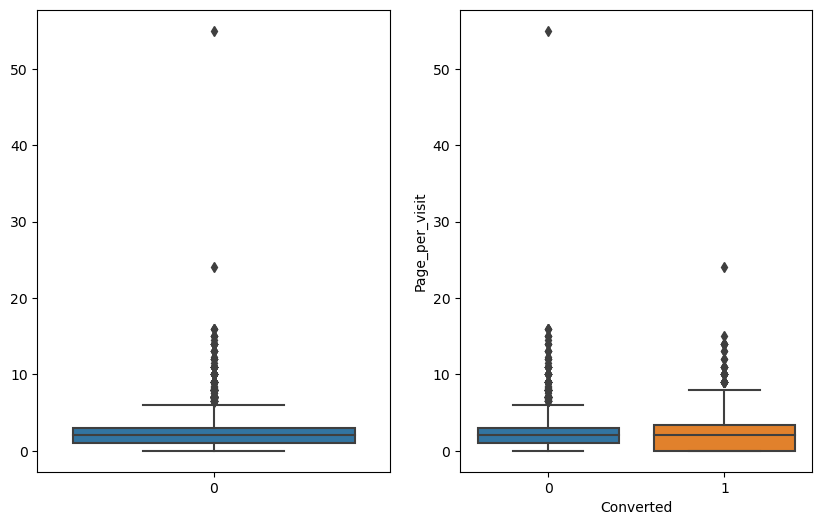

In [156]:
# Box Plot for data distribution
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(data["Page_per_visit"])
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Converted",y="Page_per_visit")
plt.show()

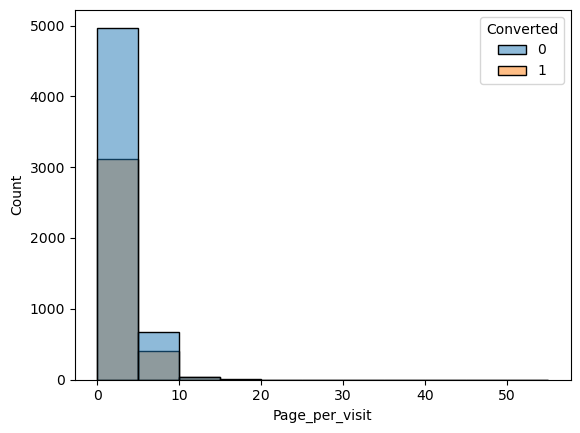

In [157]:
sns.histplot(data=data,x="Page_per_visit",hue="Converted",binwidth=5)
plt.show()

**Observation :-**
1. 99% of leads have "Page_per_visit" less than 14. There are few records with very high values which can be considered outlier
2. Median value of "Page_per_visit" for both negative and positve leads are same .
3. Outliers value above 99 percentile values to be replaced with 99 percentile value


In [158]:
data.columns

Index(['Lead Origin', 'Lead Source', 'DN_Email', 'Converted', 'TotalVisits',
       'Web_Time', 'Page_per_visit', 'Last Activity', 'Specialization',
       'XEDU_Ref', 'Occupation', 'Reason_course_select', 'Tags',
       'Lead Quality', 'Free_Copy', 'Notable_Activity'],
      dtype='object')

In [159]:
data["Page_per_visit"]=data["Page_per_visit"].apply(lambda x:data["Page_per_visit"].quantile(0.99) if x > data["Page_per_visit"].quantile(0.999) else x)

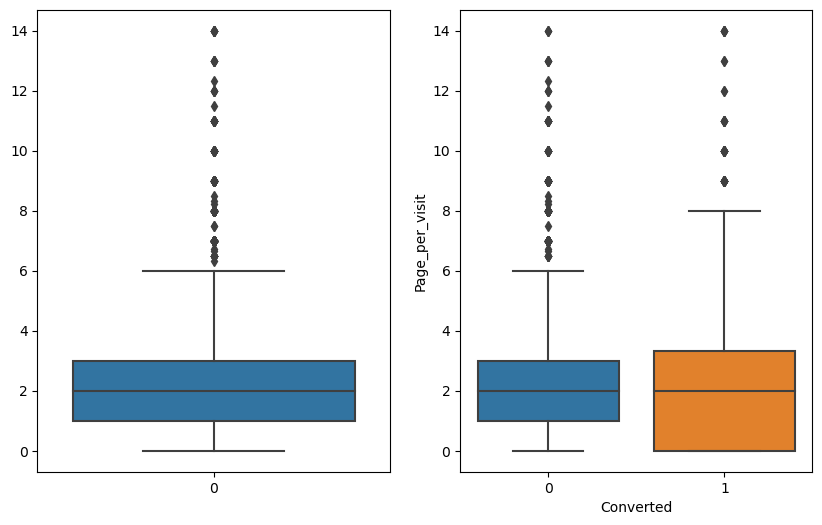

In [160]:
# Verify Chages
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(data["Page_per_visit"])
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Converted",y="Page_per_visit")
plt.show()


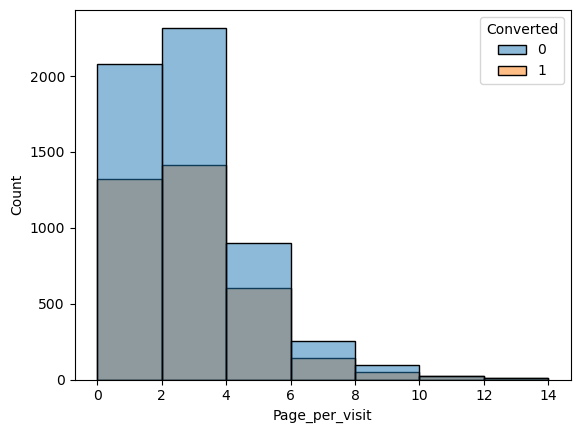

In [161]:
sns.histplot(data=data,x="Page_per_visit",hue="Converted",binwidth=2)
plt.show()

**Observation :-**
1. 99% of leads have "Page_per_visit" less than 14. There are few records with very high values which can be considered outlier
2. Median value of "Page_per_visit" for both negative and positve leads are same .
3. Outliers value above 99 percentile values to be replaced with 99 percentile value


## **Multivariate Analysis of Numerical Data**

<Axes: >

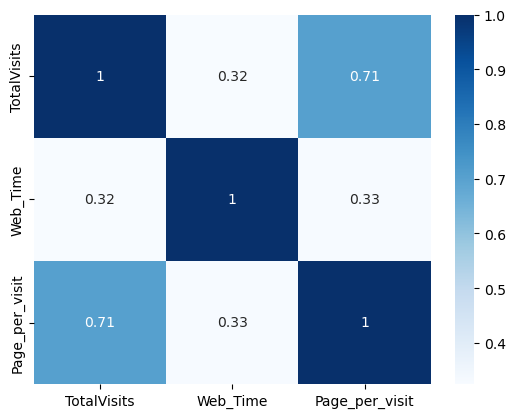

In [162]:
sns.heatmap(data[num_col].corr(),annot=True,cmap="Blues")

**Observation :-**
1. There is a very high correlation between "TotalVisits" and "Page_per_visit" which can reduce performance of model due to high colinearity. We can drop Page_per_visit to resolve this issue


In [163]:
# Drop Page_per_visit column
data.drop(columns="Page_per_visit",axis=1,inplace=True)

## **Multivariate Analysis Catagorical Columns**

### **Lead Origin vs Lead Source**

<Axes: xlabel='Lead Source', ylabel='Lead Origin'>

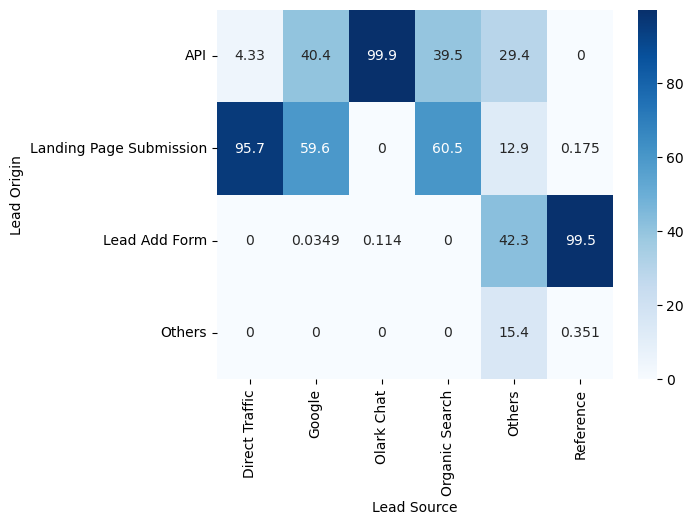

In [164]:
sns.heatmap(pd.crosstab(data["Lead Origin"],data["Lead Source"],normalize="columns")*100,cmap="Blues",annot=True,fmt="0.3g")

In [165]:
data["Lead Source"].value_counts()*100/len(data)

Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          6.168831
Others             3.787879
Name: Lead Source, dtype: float64

**Observation :-**
There seems some correlation between "Lead Soruce" and "Lead Origin" . Needs further analysis to include both features during model building

### **Last Activity vs Notable_Activity**

<Axes: xlabel='Notable_Activity', ylabel='Last Activity'>

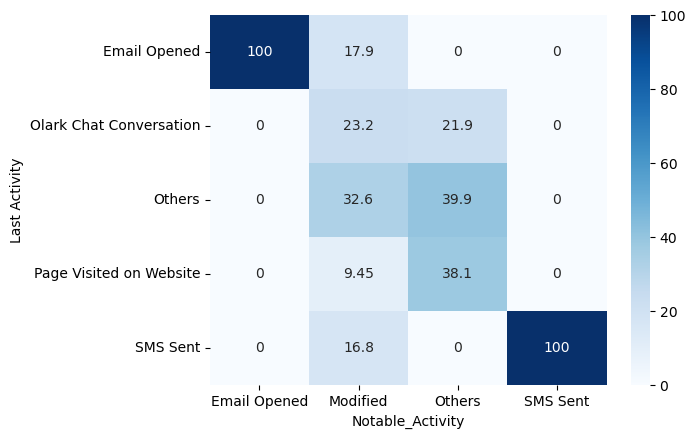

In [166]:
sns.heatmap(pd.crosstab(data["Last Activity"],data["Notable_Activity"],normalize="columns")*100,cmap="Blues",annot=True,fmt="0.3g")

In [167]:
data["Notable_Activity"].value_counts()*100/len(data["Notable_Activity"])

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Notable_Activity, dtype: float64

**Observation :-**
There seems some correlation between "Last Activity" and "Notable_Activity" . Needs further analysis to include both features during model building

# **Data Preprocessing**

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Origin           9240 non-null   object 
 1   Lead Source           9240 non-null   object 
 2   DN_Email              9240 non-null   int64  
 3   Converted             9240 non-null   int64  
 4   TotalVisits           9240 non-null   float64
 5   Web_Time              9240 non-null   int64  
 6   Last Activity         9240 non-null   object 
 7   Specialization        9240 non-null   object 
 8   XEDU_Ref              9240 non-null   object 
 9   Occupation            9240 non-null   object 
 10  Reason_course_select  9240 non-null   object 
 11  Tags                  9240 non-null   object 
 12  Lead Quality          9240 non-null   object 
 13  Free_Copy             9240 non-null   int64  
 14  Notable_Activity      9240 non-null   object 
dtypes: float64(1), int64(

## **Feature Creatiion :- Convert Numerical Column Catagorical Column**

In [169]:
# Convert "TotalVisits" , "Web_Time" to categorical columns
data["cat_TotalVisits"] =pd.qcut(data["TotalVisits"],q=4)
data["cat_Web_Time"] = pd.qcut(data["Web_Time"],q=4)

In [170]:
data["cat_TotalVisits"].value_counts()

(1.0, 3.0]       3123
(-0.001, 1.0]    2584
(3.0, 5.0]       1903
(5.0, 17.0]      1630
Name: cat_TotalVisits, dtype: int64

In [171]:
data["cat_Web_Time"].value_counts()

(-0.001, 12.0]     2320
(248.0, 936.0]     2310
(936.0, 2272.0]    2308
(12.0, 248.0]      2302
Name: cat_Web_Time, dtype: int64

In [172]:
# List of Catagorical Columns to be binned
col_bin = ['Lead Origin', 'Lead Source', 'DN_Email',  'Last Activity', 'Specialization', 'XEDU_Ref', 'Occupation',
       'Reason_course_select', 'Tags', 'Lead Quality', 'Free_Copy',
       'Notable_Activity', 'cat_TotalVisits', 'cat_Web_Time']

In [173]:
# List of Numerical Columns to be scaled
num_col=["TotalVisits","Web_Time"]

## **One Hot Encoding / Binning of Catagorical Columns**

In [174]:
data = pd.get_dummies(data,columns=col_bin,drop_first=True)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Web_Time                                  9240 non-null   int64  
 3   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 4   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 5   Lead Origin_Others                        9240 non-null   uint8  
 6   Lead Source_Google                        9240 non-null   uint8  
 7   Lead Source_Olark Chat                    9240 non-null   uint8  
 8   Lead Source_Organic Search                9240 non-null   uint8  
 9   Lead Source_Others                        9240 non-null   uint8  
 10  Lead Source_Reference               

## Train Test Split Dataset

In [176]:
## Import Library
from sklearn.model_selection import train_test_split


In [177]:
data.columns

Index(['Converted', 'TotalVisits', 'Web_Time',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'DN_Email_1',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'Specialization_Select', 'XEDU_Ref_Others', 'XEDU_Ref_Select',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Select',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Reason_course_select_Others',
       'Reason_course_select_Select', 'Tags_Interested in other courses',
       'Tags_Others', 'Tags_Ringing', 'Tags_Select',
       'Tags_Will revert after r

In [178]:
X=data.drop(columns="Converted",axis=1)
y=data["Converted"]
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.7,random_state=100)

In [179]:
# Verify split
print(X_train.shape)
print(X_test.shape)

(6468, 49)
(2772, 49)


## Scaling of Numerical Feature

In [180]:
# Import Min-Max Scaler 
from sklearn.preprocessing import MinMaxScaler

# Create MinM-Max Scaler Objects
scaler = MinMaxScaler()

# Applying Scaling on tain_dataset
X_train[num_col]=scaler.fit_transform(X_train[num_col])

# Applying Scaling on test dataset
X_test[num_col] = scaler.transform(X_test[num_col])

In [181]:
# Verify Scaling
print("Train Data")
print(X_train[num_col].describe())
print("-"*50)
print("Test Data")
print(X_test[num_col].describe())

Train Data
       TotalVisits     Web_Time
count  6468.000000  6468.000000
mean      0.195942     0.212974
std       0.191627     0.240566
min       0.000000     0.000000
25%       0.058824     0.005282
50%       0.176471     0.108275
75%       0.294118     0.407790
max       1.000000     1.000000
--------------------------------------------------
Test Data
       TotalVisits     Web_Time
count  2772.000000  2772.000000
mean      0.195314     0.218582
std       0.185874     0.242693
min       0.000000     0.000000
25%       0.058824     0.005722
50%       0.176471     0.113556
75%       0.294118     0.417694
max       1.000000     0.991637


## Find Correlation Between Various Features in X_Train

# Model Building

In [182]:
# check data imbalance in target columns
y_train.mean()

0.3812615955473098

## Feature_Elemenation using RFE

In [183]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [184]:
# Create Logistic Regression and RFE Objects
lgr=LogisticRegression()
rfe = RFE(estimator=lgr,n_features_to_select=20)

In [185]:
#fit RFE and extract Result
rfe.fit(X_train,y_train)
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_result = pd.DataFrame(rfe_list,columns=["Feature_Name","RFE_Support","RFE_Ranking"]).sort_values(by="RFE_Ranking")
rfe_result

,Feature_Name,RFE_Support,RFE_Ranking
48,"cat_Web_Time_(936.0, 2272.0]",True,1
35,Lead Quality_Might be,True,1
36,Lead Quality_Not Sure,True,1
37,Lead Quality_Select,True,1
38,Lead Quality_Worst,True,1
28,Reason_course_select_Select,True,1
12,Last Activity_Others,True,1
11,Last Activity_Olark Chat Conversation,True,1
34,Lead Quality_Low in Relevance,True,1
10,DN_Email_1,True,1


In [186]:
# Lit of Featues shorlisted by RFE
rfe_col=rfe_result[rfe_result["RFE_Support"]==True]["Feature_Name"].values.tolist()

## **Manual Fine Tuning of Model**

### Model 2

In [187]:
# Import Library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
# Create Function for Logistic Regression Model
def LGR():
    X_train_sm = sm.add_constant(X_train[rfe_col])
    lgm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res = lgm.fit()
    vif = pd.DataFrame()
    vif["Features"] = X_train[rfe_col].columns
    vif["vif"] = [round(variance_inflation_factor(X_train[rfe_col],i),2) for i in range(X_train[rfe_col].shape[1])]
    return res,res.summary(),vif
    

#### Model_1 (Include All features shortlisted by RFE

In [189]:
LGR()

(<statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x10dc22fed10>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:              Converted   No. Observations:                 6468
 Model:                            GLM   Df Residuals:                     6447
 Model Family:                Binomial   Df Model:                           20
 Link Function:                  Logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -1529.5
 Date:                Sun, 18 Feb 2024   Deviance:                       3059.0
 Time:                        14:43:47   Pearson chi2:                 9.76e+03
 No. Iterations:                    21   Pseudo R-squ. (CS):             0.5753
 Covariance Type:            nonrobust                                         
                                                coef    std err    

#### Model 2 (Remove Occupation_Housewife

In [190]:
rfe_col.remove('Occupation_Housewife')

In [191]:
LGR()

(<statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x10dc6025d90>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:              Converted   No. Observations:                 6468
 Model:                            GLM   Df Residuals:                     6448
 Model Family:                Binomial   Df Model:                           19
 Link Function:                  Logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -1531.5
 Date:                Sun, 18 Feb 2024   Deviance:                       3063.0
 Time:                        14:43:47   Pearson chi2:                 9.79e+03
 No. Iterations:                     7   Pseudo R-squ. (CS):             0.5751
 Covariance Type:            nonrobust                                         
                                                coef    std err    

#### Model 2 (Remove "Web_Time")

In [192]:
rfe_col.remove("Web_Time")

In [193]:
LGR()

(<statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x10dc60390d0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:              Converted   No. Observations:                 6468
 Model:                            GLM   Df Residuals:                     6449
 Model Family:                Binomial   Df Model:                           18
 Link Function:                  Logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -1540.5
 Date:                Sun, 18 Feb 2024   Deviance:                       3080.9
 Time:                        14:43:48   Pearson chi2:                 9.83e+03
 No. Iterations:                     7   Pseudo R-squ. (CS):             0.5739
 Covariance Type:            nonrobust                                         
                                                coef    std err    

**Observation:-**
After Removing Web_Time ; All p values are within range so this can be considered final model for further evaluation

# Model Evaluation

## Train Final Model 

In [194]:
# Create Predictions on Final Model
X_train_sm = sm.add_constant(X_train[rfe_col])
lgm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = lgm.fit()
vif = pd.DataFrame()
vif["Features"] = X_train[rfe_col].columns
vif["vif"] = [round(variance_inflation_factor(X_train[rfe_col],i),2) for i in range(X_train[rfe_col].shape[1])]
y_train_pred = res.predict(X_train_sm)

In [195]:
result=pd.DataFrame()
result["pred_prob"]=y_train_pred
result["Actual"] = pd.DataFrame(y_train)

In [196]:
result

,pred_prob,Actual
1871,0.006265,0
6795,0.477079,0
3516,0.003401,0
8105,0.173482,0
3934,0.477079,0
...,...,...
350,0.998818,1
79,0.996054,1
8039,0.477079,1
6936,0.056735,0


## Find Optimum Cutoff Threshold - ROC Curve

In [197]:
# Import Librar
from sklearn.metrics import roc_curve,roc_auc_score

In [198]:
# Find parameters to draw ROC Curve
fpr,tpr,thresholds = roc_curve(result["Actual"],result["pred_prob"])

In [199]:
# find Area Under Curve
auc_score_final = roc_auc_score(result["Actual"],result["pred_prob"])

In [200]:
# Define Function to Draw ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

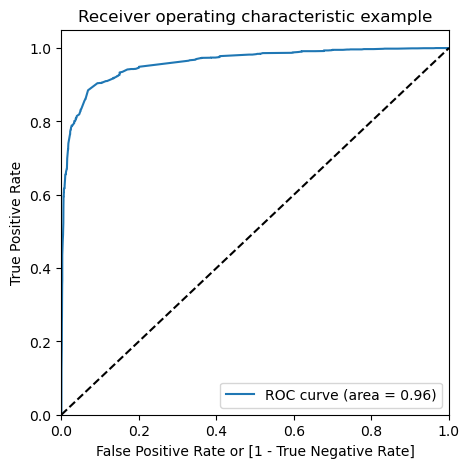

In [201]:
draw_roc(result["Actual"],result["pred_prob"])

In [202]:
# find optimum threshold value 
threshold_index = np.argmax(tpr-fpr)
threshold_value = thresholds[threshold_index]
print(round(threshold_value,2))

0.41


**Observation:-**
From ROC Curve Optimum Probabiltiy is 0.41

## Evaluation of Models on Various Metrices

**Comapny has given target of at least 80% lead turning Positive i.e. Out of Total Leads identified as Hot Leads ( Potential Positive ) , 80% should turn actual positive.**

**The Matrix to be considered is TPR(Recall / Sensitity) = True Positive / Total Actual Positive = TP/(TP+FM) should be atleast 80%**

In [203]:
result["Predict"] = result["pred_prob"].map(lambda x:1 if x>0.41 else 0)

In [204]:
result.sample(20)

,pred_prob,Actual,Predict
3568,0.013088,0,0
3620,0.037156,0,0
1136,0.010088,0,0
3205,0.121784,0,0
6734,0.007632,0,0
3063,0.211307,1,0
8324,0.037156,0,0
8169,0.011300,0,0
4780,0.822073,1,1
3370,0.997842,1,1


In [205]:
#fina overall accuracy score of Model
from sklearn import metrics
model_accuracy = round(metrics.accuracy_score(result["Actual"],result["Predict"]),2)*100
print("Overall Model Accuracy Score is:",model_accuracy,"%")

Overall Model Accuracy Score is: 91.0 %


In [206]:
# Create Confusion Matrix and find various parameters
cm = metrics.confusion_matrix(result["Actual"],result["Predict"])
TN = cm[0,0] # True Negative
FN = cm[1,0] # False Negative
TP = cm[1,1] # True Positivie
FP = cm[0,1] # False Positive

In [207]:
# Calculate TPR 
TPR = round(TP /(TP+FN)*100 ,2)
print("TPR is :", TPR,"%")

TPR is : 88.44 %


**Observation:-**
1. Overall accuracy score of model is 91% and TPR is 88.44% . So the performance of model on train dataset is acceptable

## Accuracy of Model on Test Dataset

In [208]:
# Find Prediction on Test Dataset
X_test_sm = sm.add_constant(X_test[rfe_col])
y_test_pred = res.predict(X_test_sm)

In [209]:
# Store Result in Dataset with prediction based on >0.41 as cutoff
result_test=pd.DataFrame()
result_test["pred_prob"]=y_test_pred
result_test["Actual"] = pd.DataFrame(y_test)
result_test["Predict"] =result_test["pred_prob"].map(lambda x:1 if x>0.41 else 0)

In [210]:
# find accuracy of model on Test Dataset
model_accuracy_test = round(metrics.accuracy_score(result_test["Actual"],result_test["Predict"]),2)*100
print("Overall Model Accuracy Score is:",model_accuracy_test,"%")

Overall Model Accuracy Score is: 92.0 %


In [211]:
# Create Confusion Matrix and find various parameters
cm = metrics.confusion_matrix(result_test["Actual"],result_test["Predict"])
TN = cm[0,0] # True Negative
FN = cm[1,0] # False Negative
TP = cm[1,1] # True Positivie
FP = cm[0,1] # False Positive

In [212]:
# Calculate TPR 
TPR = round(TP /(TP+FN)*100 ,2)
print("TPR is :", TPR,"%")

TPR is : 89.13 %


**Observation:-**
Model Accuracy on test data set is 92% and TPR is also 89% . Also AUC Score is 96% which is very high so can be considered as ideal model

# Model Interpretation

In [213]:
#Summary of Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1540.5
Date:                Sun, 18 Feb 2024   Deviance:                       3080.9
Time:                        14:43:48   Pearson chi2:                 9.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5739
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5112      0.410     -3.686      0.000      -2.315      -0.708
cat_Web_Time_(936.0, 2272.0]                 1.5840      0.110     14.433      0.000       1.369       1.799
Lead Quality_Might be                       -2.4299      0.324     -7.489      0.000      -3.066      -1.794
Lead Quality_Not Sure                       -2.7291      0.319     -8.564      0.000      -3.354      -2.105
Lead Quality_Select                         -2.3155      0.309     -7.504      0.000      -2.920      -1.711
Lead Quality_Worst                          -4.1674      0.455     -9.158      0.000      -5.059      -3.276
Reason_course_select_Select                 -1.8839      0.137    -13.725      0.000      -2.153      -1.615
Last Activity_Others                        -0.6521      0.156     -4.189      0.000      -0.957      -0.347
Last Activity_Olark Chat Conversation       -1.2791      0.198     -6.462      0.000      -1.667      -0.891
Lead Quality_Low in Relevance               -1.3957      0.355     -3.937      0.000      -2.091      -0.701
DN_Email_1                                  -1.2128      0.220     -5.504      0.000      -1.645      -0.781
Notable_Activity_SMS Sent                    1.6222      0.120     13.534      0.000       1.387       1.857
Tags_Select                                  3.7350      0.334     11.189      0.000       3.081       4.389
Tags_Ringing                                -0.8262      0.380     -2.174      0.030      -1.571      -0.081
cat_Web_Time_(12.0, 248.0]                  -1.0273      0.133     -7.709      0.000      -1.288      -0.766
Occupation_Working Professional              0.8393      0.277      3.032      0.002       0.297       1.382
Lead Origin_Lead Add Form                    2.1870      0.233      9.405      0.000       1.731       2.643
Tags_Others                                  2.8096      0.313      8.973      0.000       2.196       3.423
Tags_Will revert after reading the email     6.0638      0.358     16.952      0.000       5.363       6.765
============================================================================================================
"""

**Observation :-**
1. **Lead Quality** is significant paramerter for probaility of lead turning to positive or negative. If Lead Quality has missing value,Not Sure,May be, Worst or Low in Relevance ,the probaility of lead turning negative is very high as they have negative correlation coefficients

2. **Tag** is also significant factor for probabilty of lead turning to positive or negative
    1. If Tag is "Will Revert After Reading Email" - Chances of Lead Turning to Positive is very high
    2. If Teg is "Ringing" - Chance of Lead Turning Negative is very high
 
 3. **Reason for Course Select** if value is missing in this field then chances of Lead turning negative is high
 
 4. **Last Activity** has value "Olark Chant Conversion" then probability of lead turning negative is high
 
 5. **DN_Email** is 1 then turning lead to negative is high
 
 6. 